# AUC Ranking for inputs
### Raw, Noise, FGSM in comparison

In [2]:
import numpy as np

import matplotlib.pyplot as plt
import mplhep as hep

import coffea.hist as hist

import time
import random
import gc

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
plt.style.use([hep.style.ROOT, hep.style.firamath])

In [7]:
NUM_DATASETS = 1

In [92]:
def plot_ranking(df,mode,param=None):
    f, ax = plt.subplots(figsize=(24, 32))
    #hep.cms.label(loc=0)

    ax.barh(df['input_name'], df['auc_bvl'], alpha=0.5, label='b vs light')
    ax.barh(df['input_name'], df['auc_bvc'], alpha=0.5, label='b vs c')
    ax.set_xlim(left=0,right=1)
    ax.set_xbound(lower=0,upper=1)
    ax.set_aspect('auto')
    plt.legend()
    plt.xlabel('AUC')
    plt.ylabel('deepCSV input')
    
    if mode == 'raw':
        plt.title(f'AUC ranking (raw)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_raw_PARAM_0.0.svg', bbox_inches='tight', facecolor='w', transparent=False)
    if mode == 'noise':
        plt.title(f'AUC ranking (Noise with $\sigma={param}$)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    if mode == 'FGSM':
        plt.title(f'AUC ranking (FGSM with $\epsilon={param}$)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_fgsm_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    
    plt.show()

In [89]:
def plot_sorted(sorted_df,mode,sort,param=None):
    f, ax = plt.subplots(figsize=(20, 20))

    ax.barh(sorted_df['input_name'][-20:], sorted_df['auc_bvl'][-20:], alpha=0.5, label='b vs light')
    ax.barh(sorted_df['input_name'][-20:], sorted_df['auc_bvc'][-20:], alpha=0.5, label='b vs c')
    ax.set_xlim(left=0,right=1)
    plt.legend()
    plt.xlabel('AUC')
    plt.ylabel('deepCSV input')
    
    if mode == 'raw':
        plt.title(f'AUC ranking (raw)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_raw_SORT_{sort}_PARAM_0.0.svg', bbox_inches='tight', facecolor='w', transparent=False)
    if mode == 'noise':
        plt.title(f'AUC ranking (Noise with $\sigma={param}$)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_noise_SORT_{sort}_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    if mode == 'FGSM':
        plt.title(f'AUC ranking (FGSM with $\epsilon={param}$)', y=1.02)
        #plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_fgsm_SORT_{sort}_PARAM_{param}.svg', bbox_inches='tight', facecolor='w', transparent=False)
    
    plt.show()

In [82]:
df_raw = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_raw_PARAM_0.0.pkl')

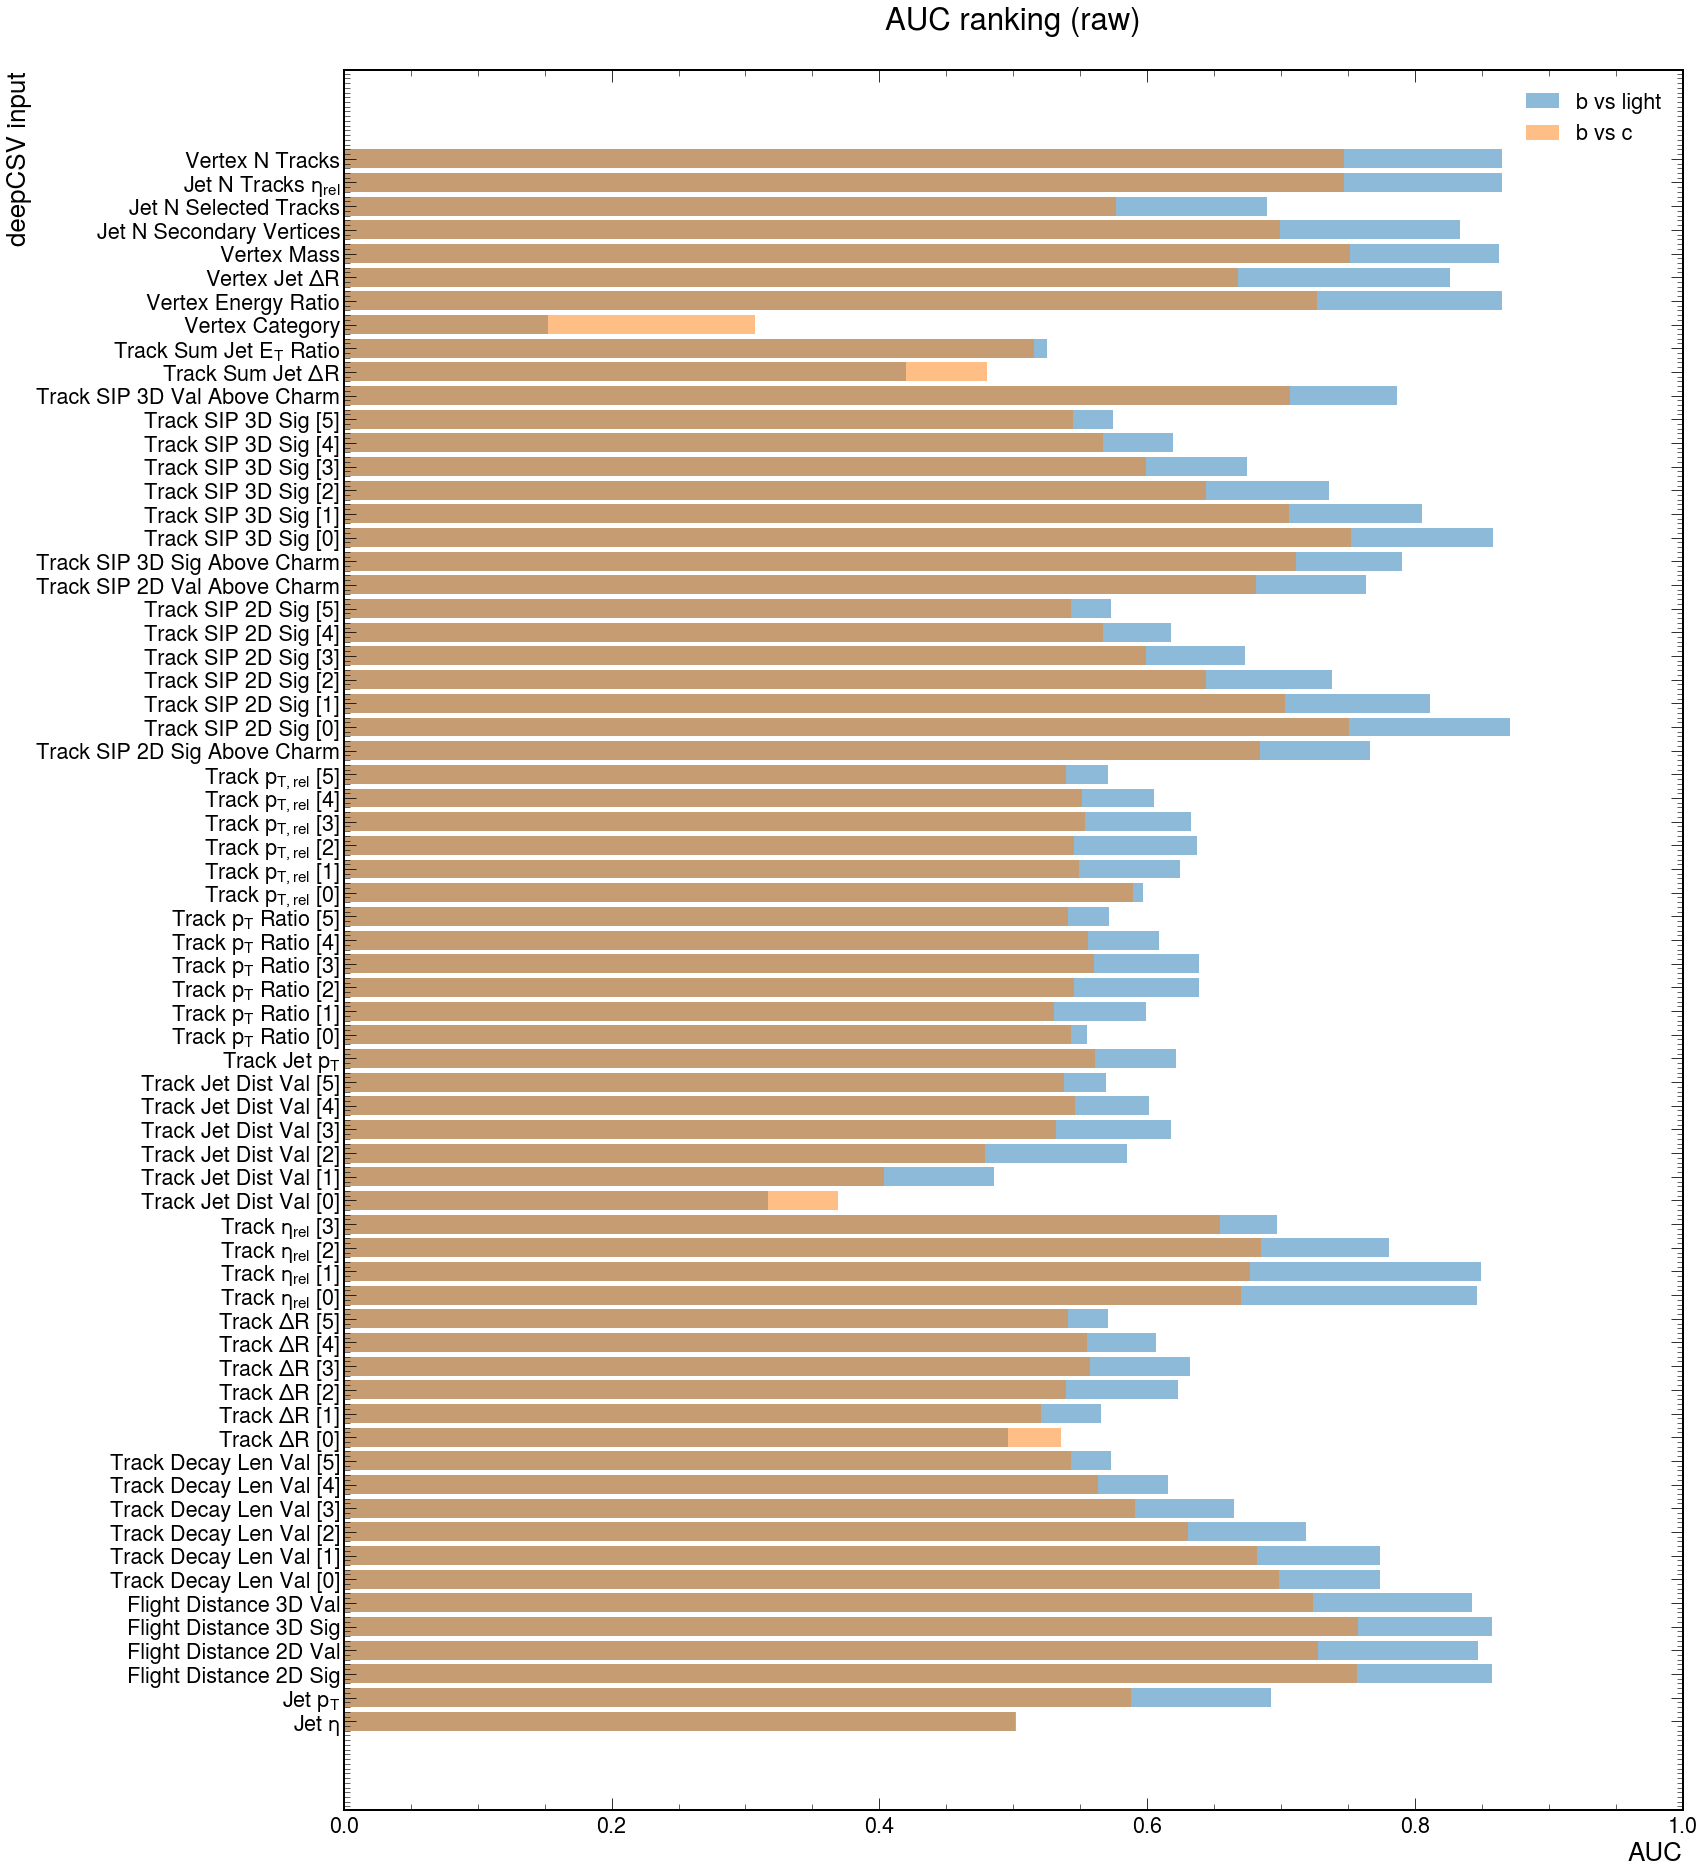

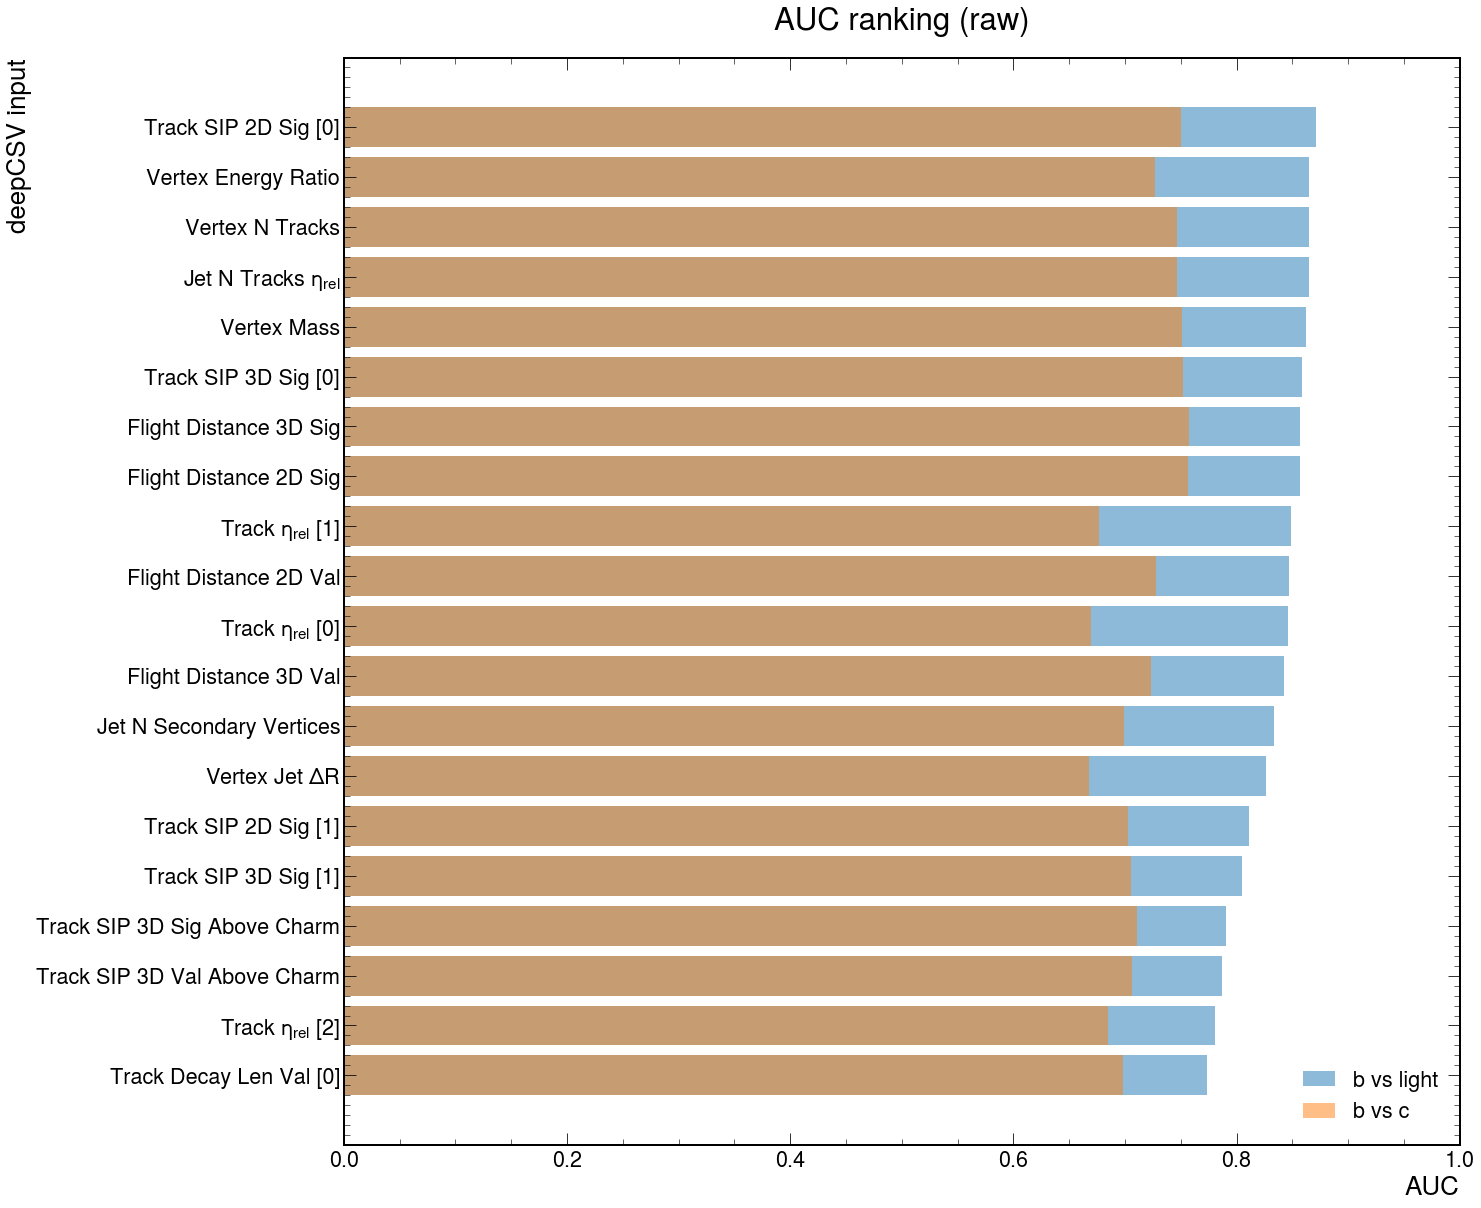

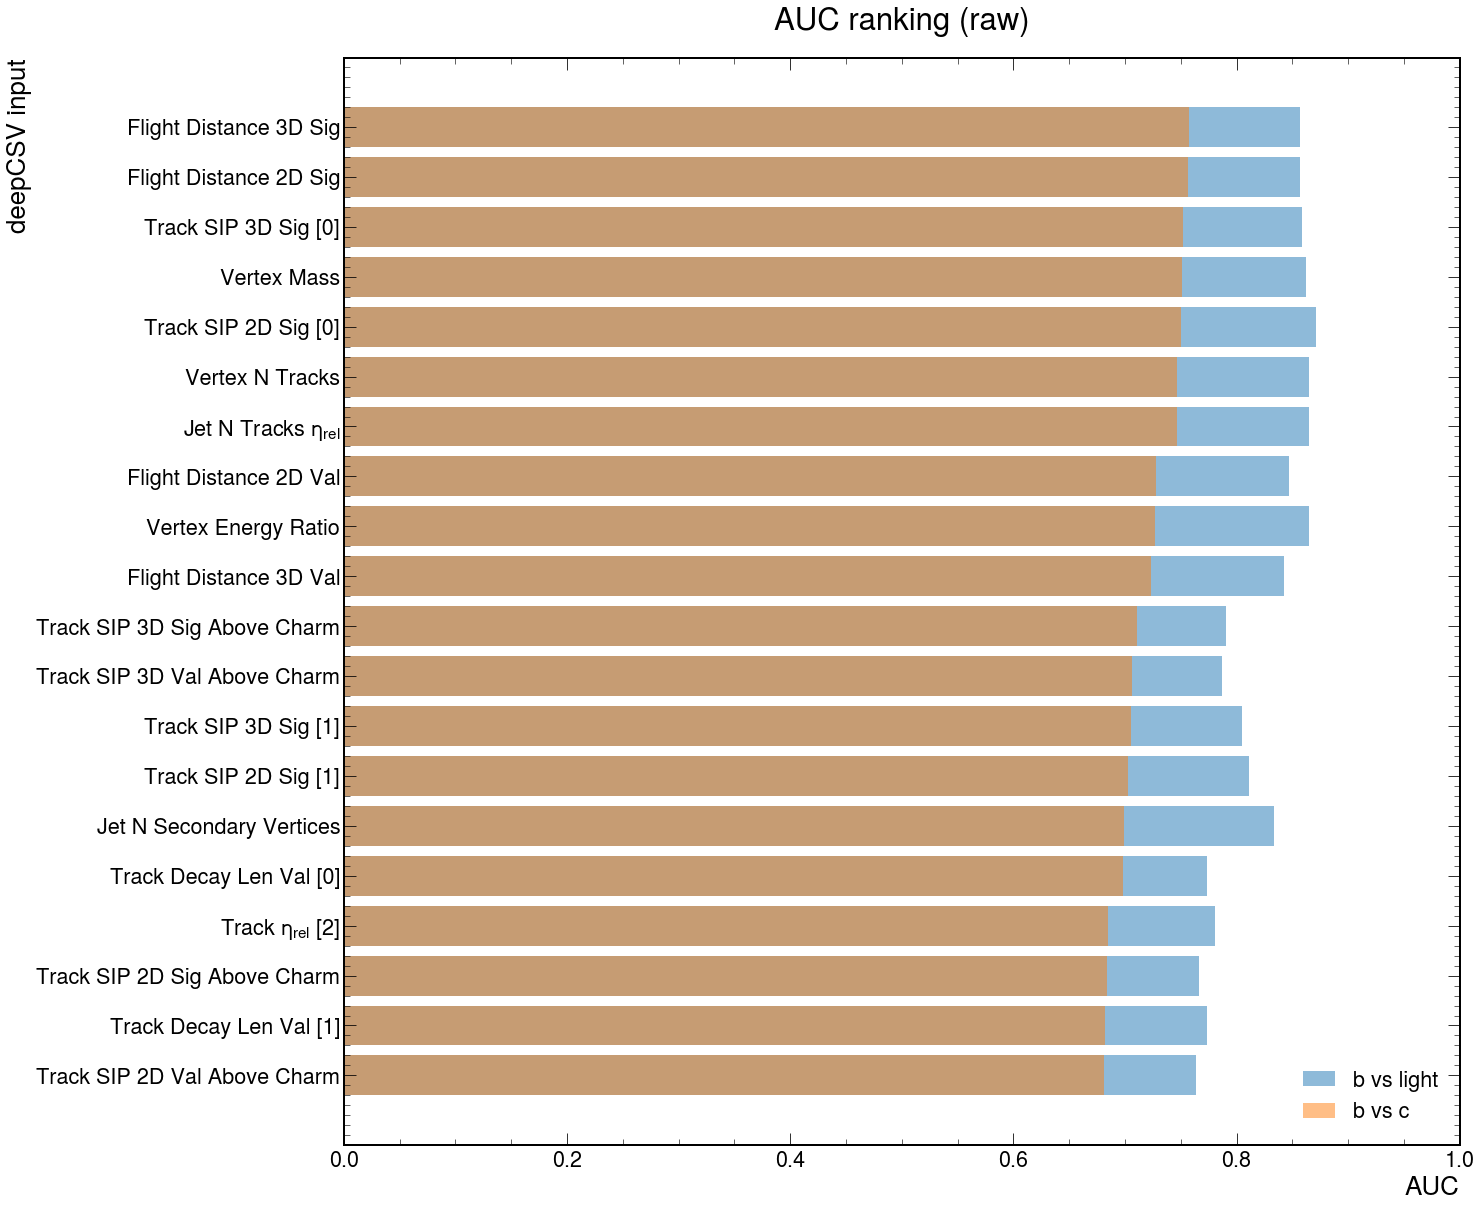

In [88]:
plot_ranking(df_raw,'raw')
plot_sorted(df_raw.sort_values('auc_bvl'),'raw','bvl')
plot_sorted(df_raw.sort_values('auc_bvc'),'raw','bvc')

In [9]:
df_noise = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_0.05.pkl')

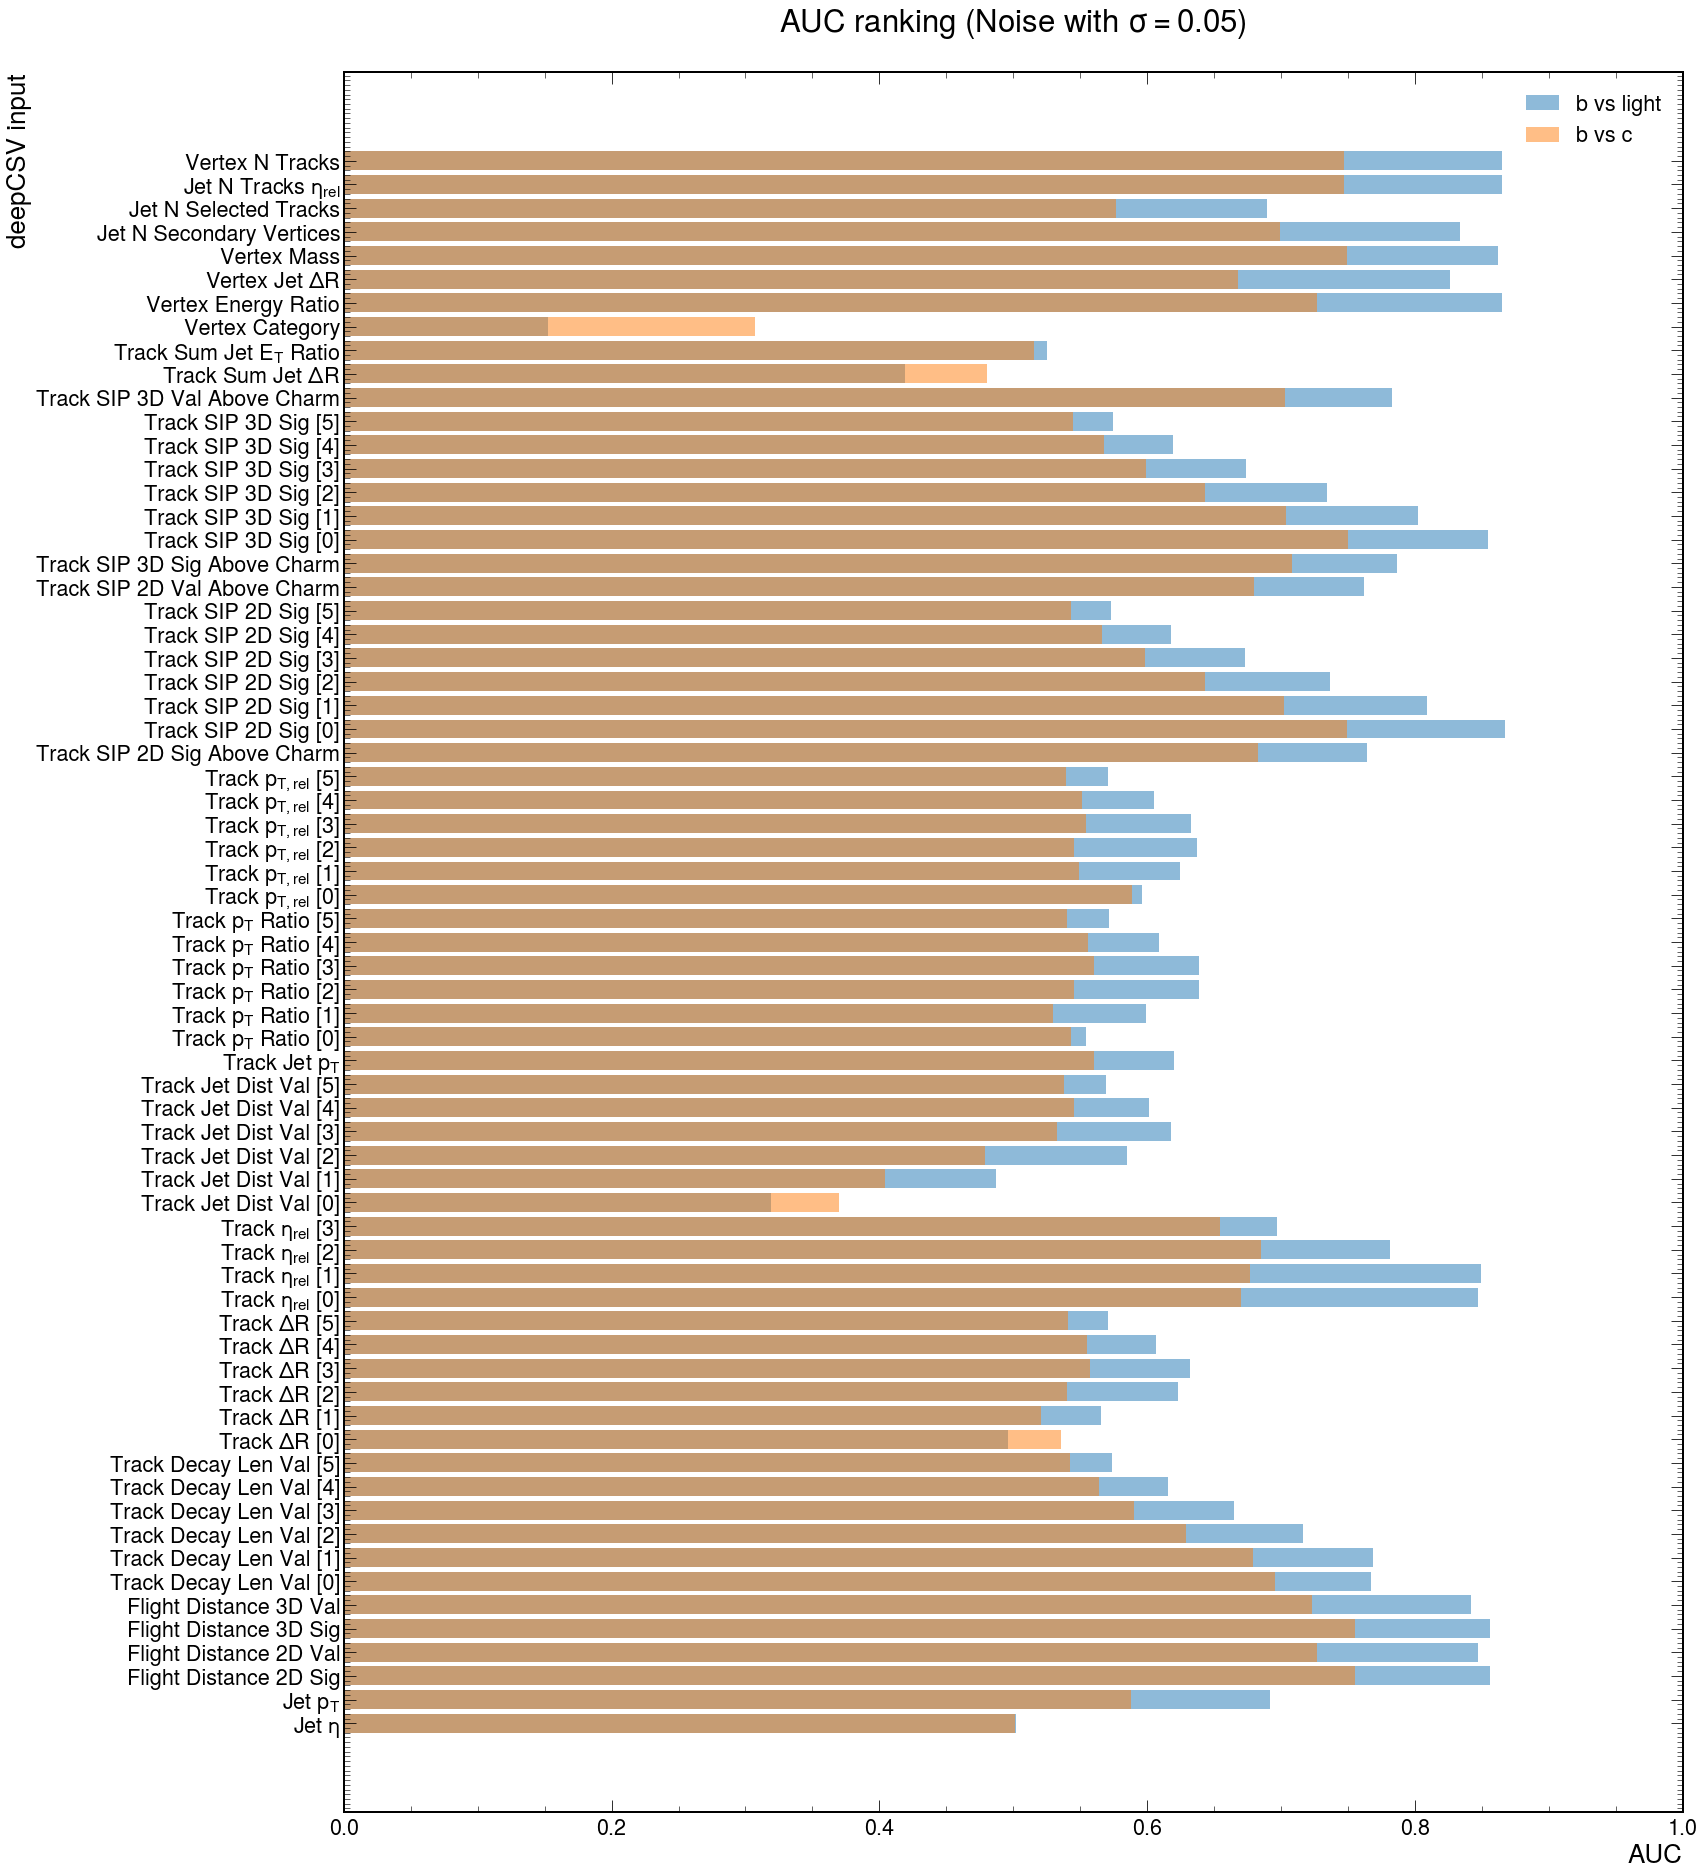

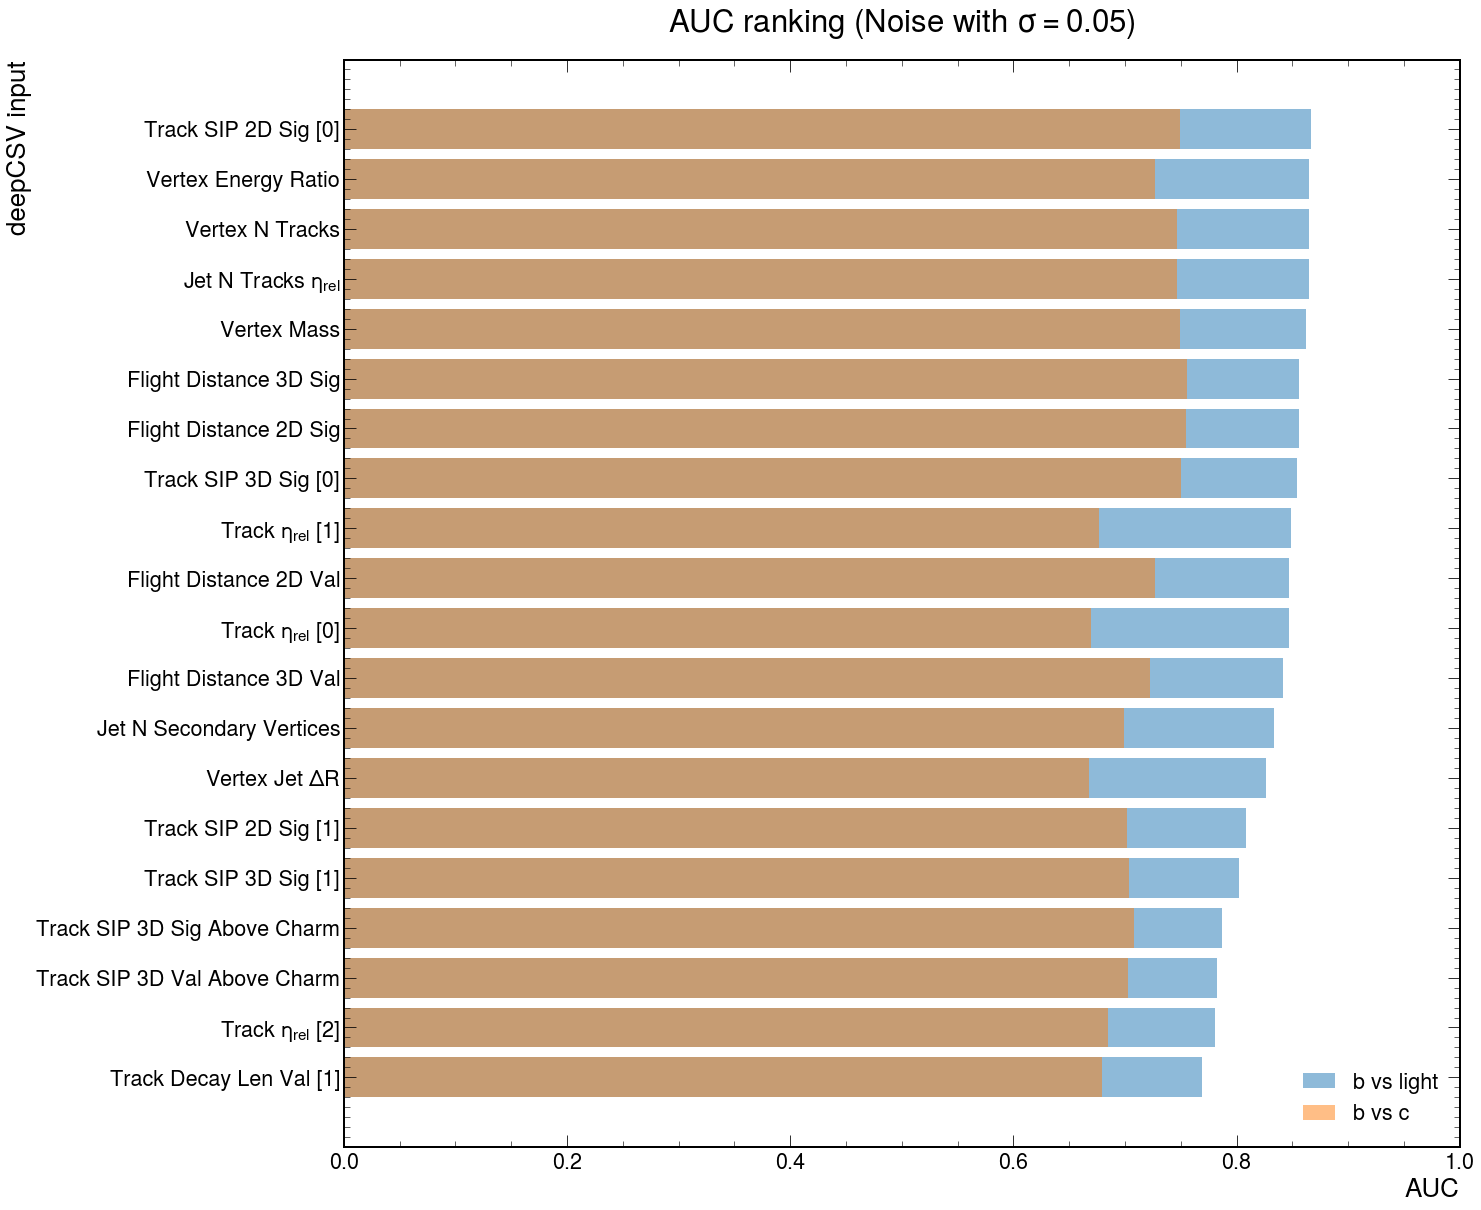

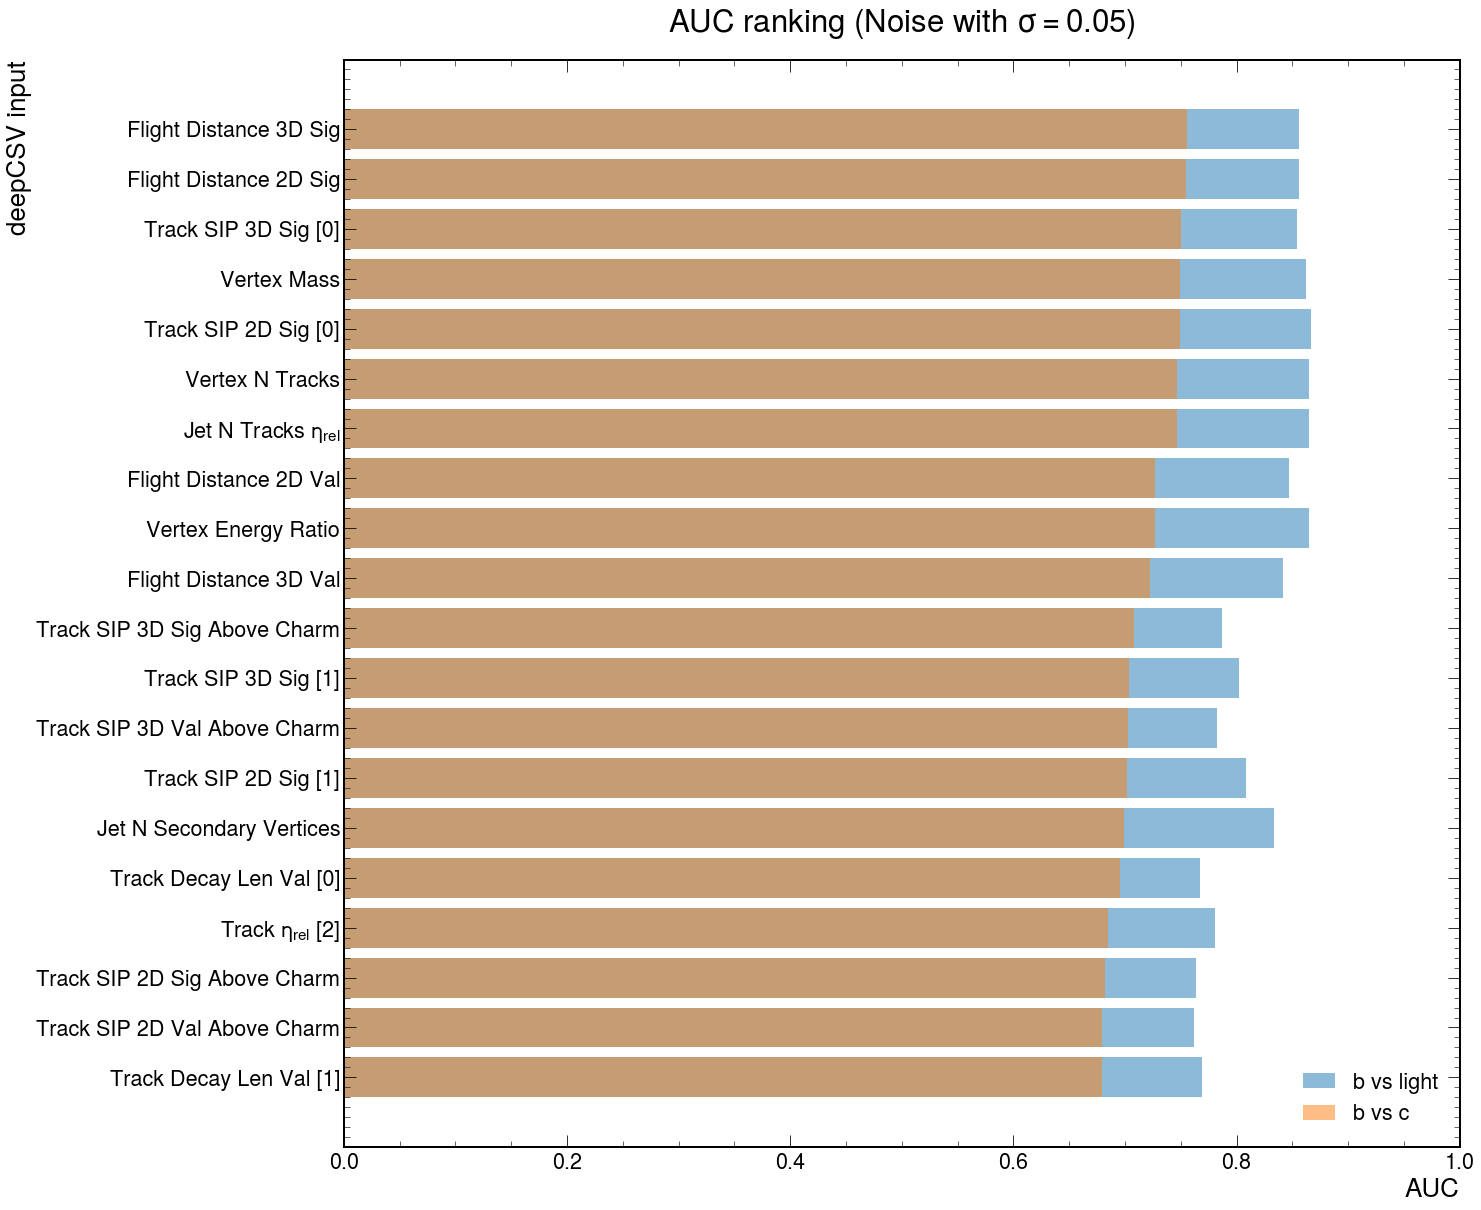

In [51]:
plot_ranking(df_noise,'noise',0.05)
plot_sorted(df_noise.sort_values('auc_bvl'),'noise','bvl',0.05)
plot_sorted(df_noise.sort_values('auc_bvc'),'noise','bvc',0.05)

In [10]:
df_fgsm = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_FGSM_PARAM_0.05.pkl')

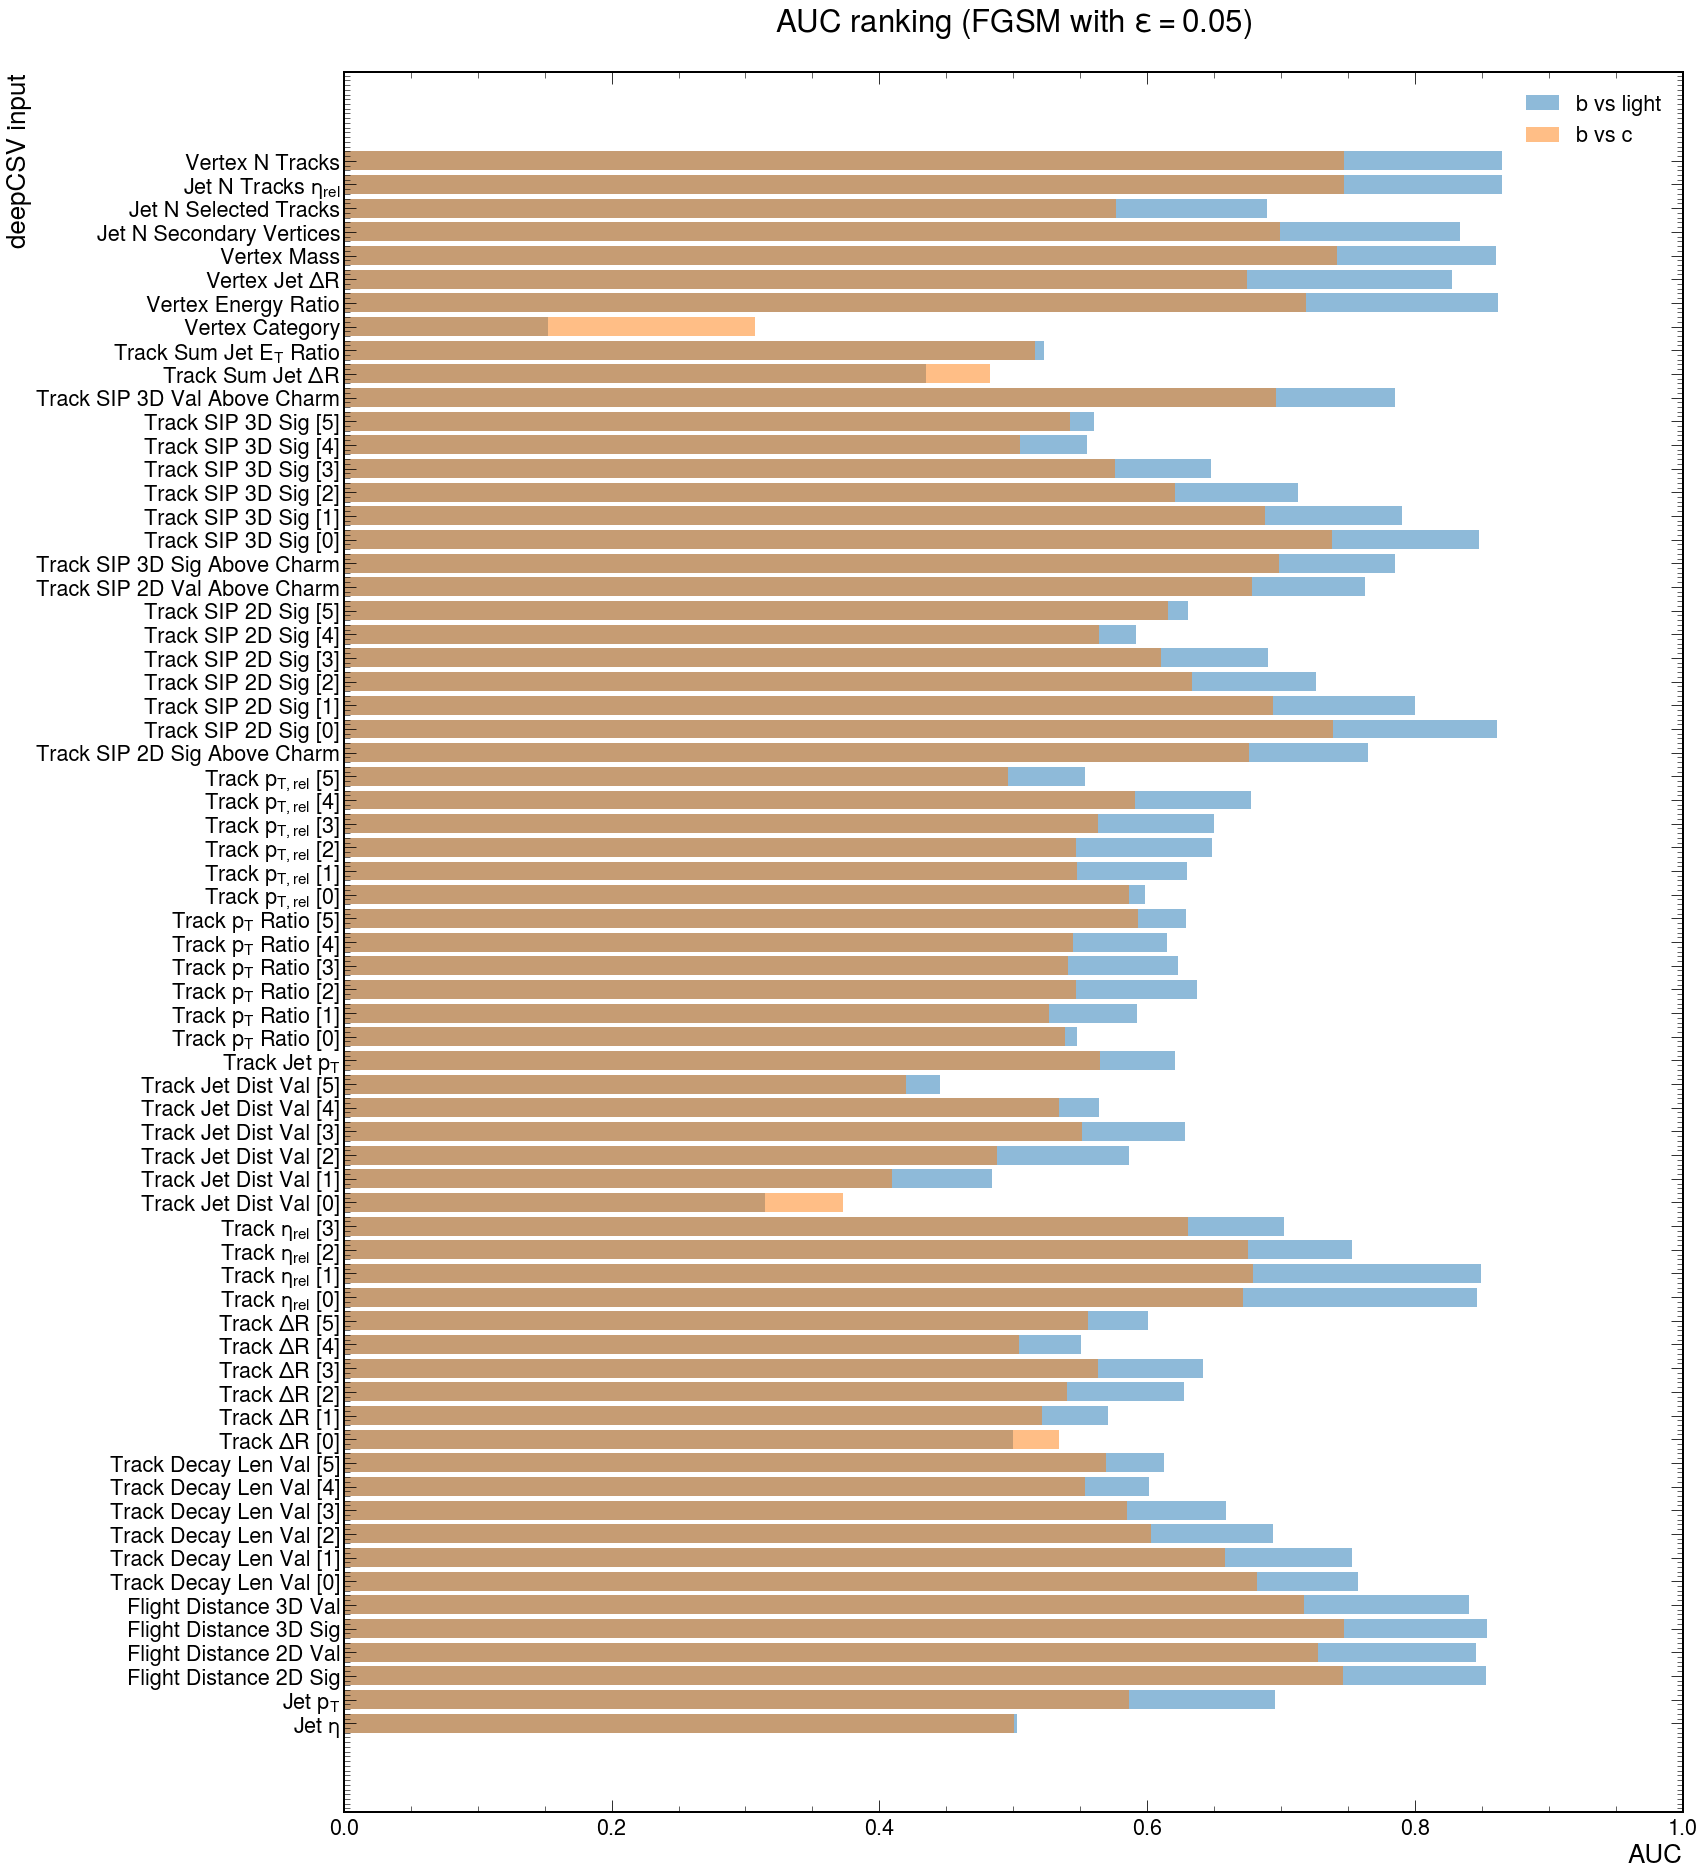

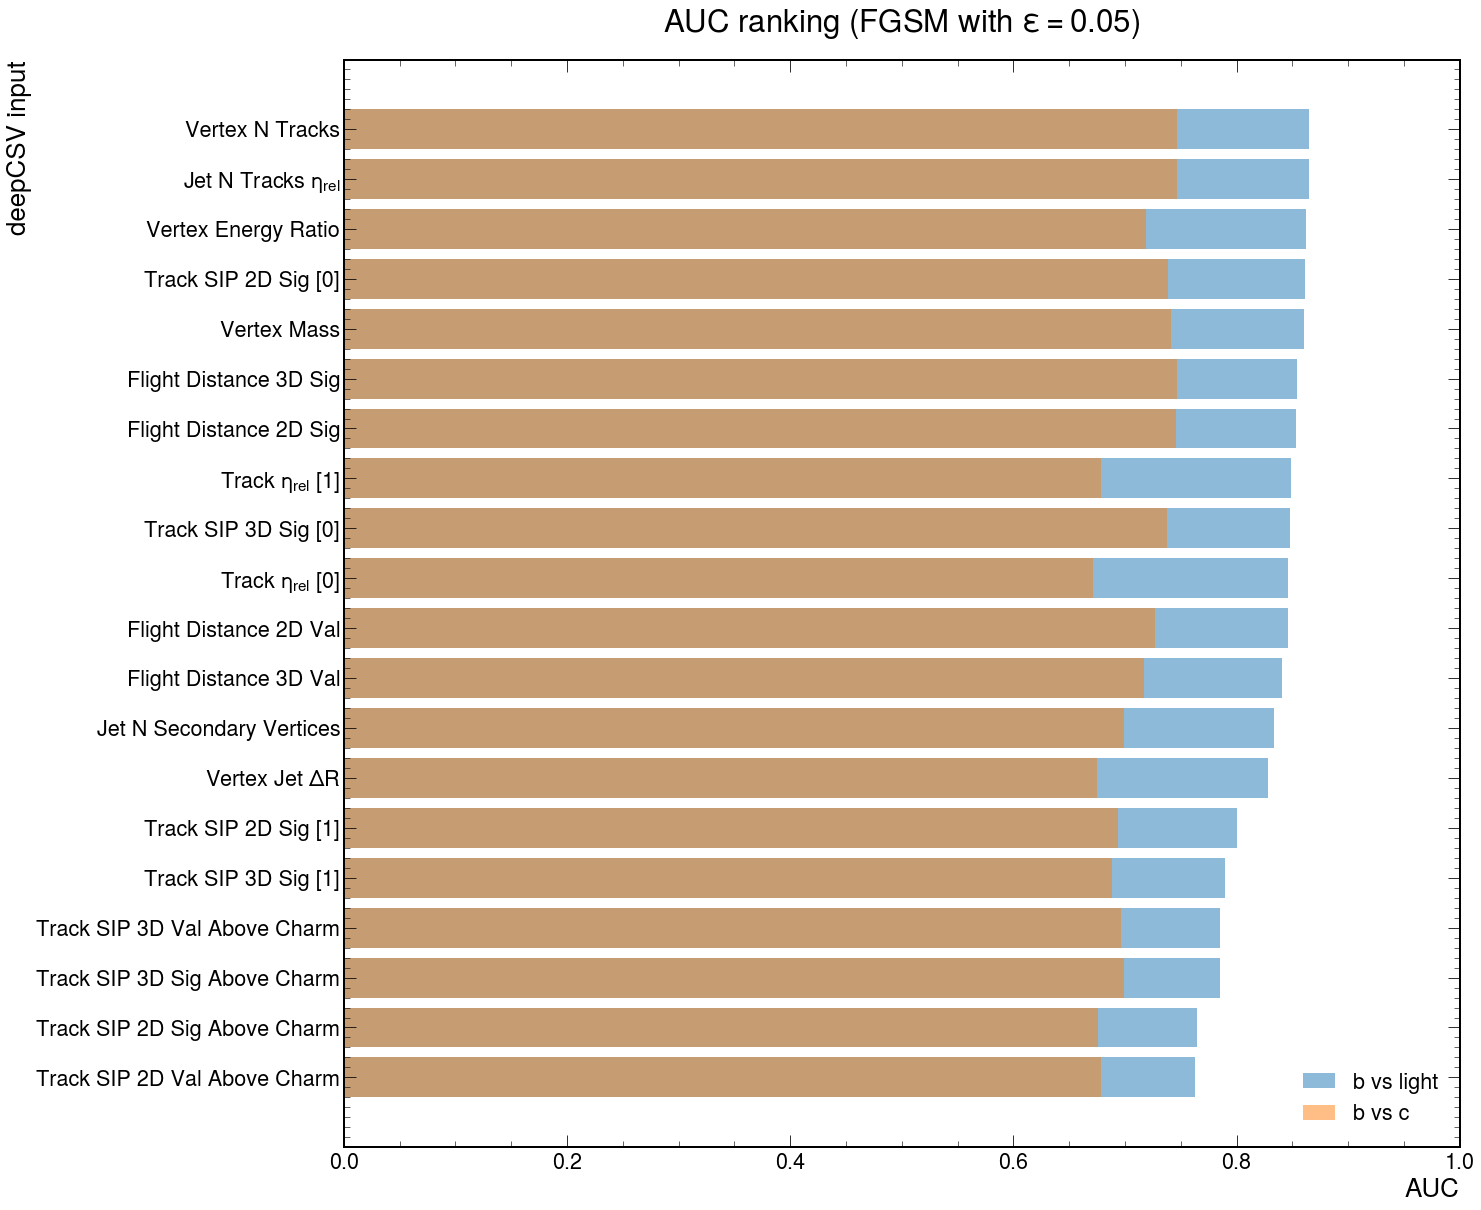

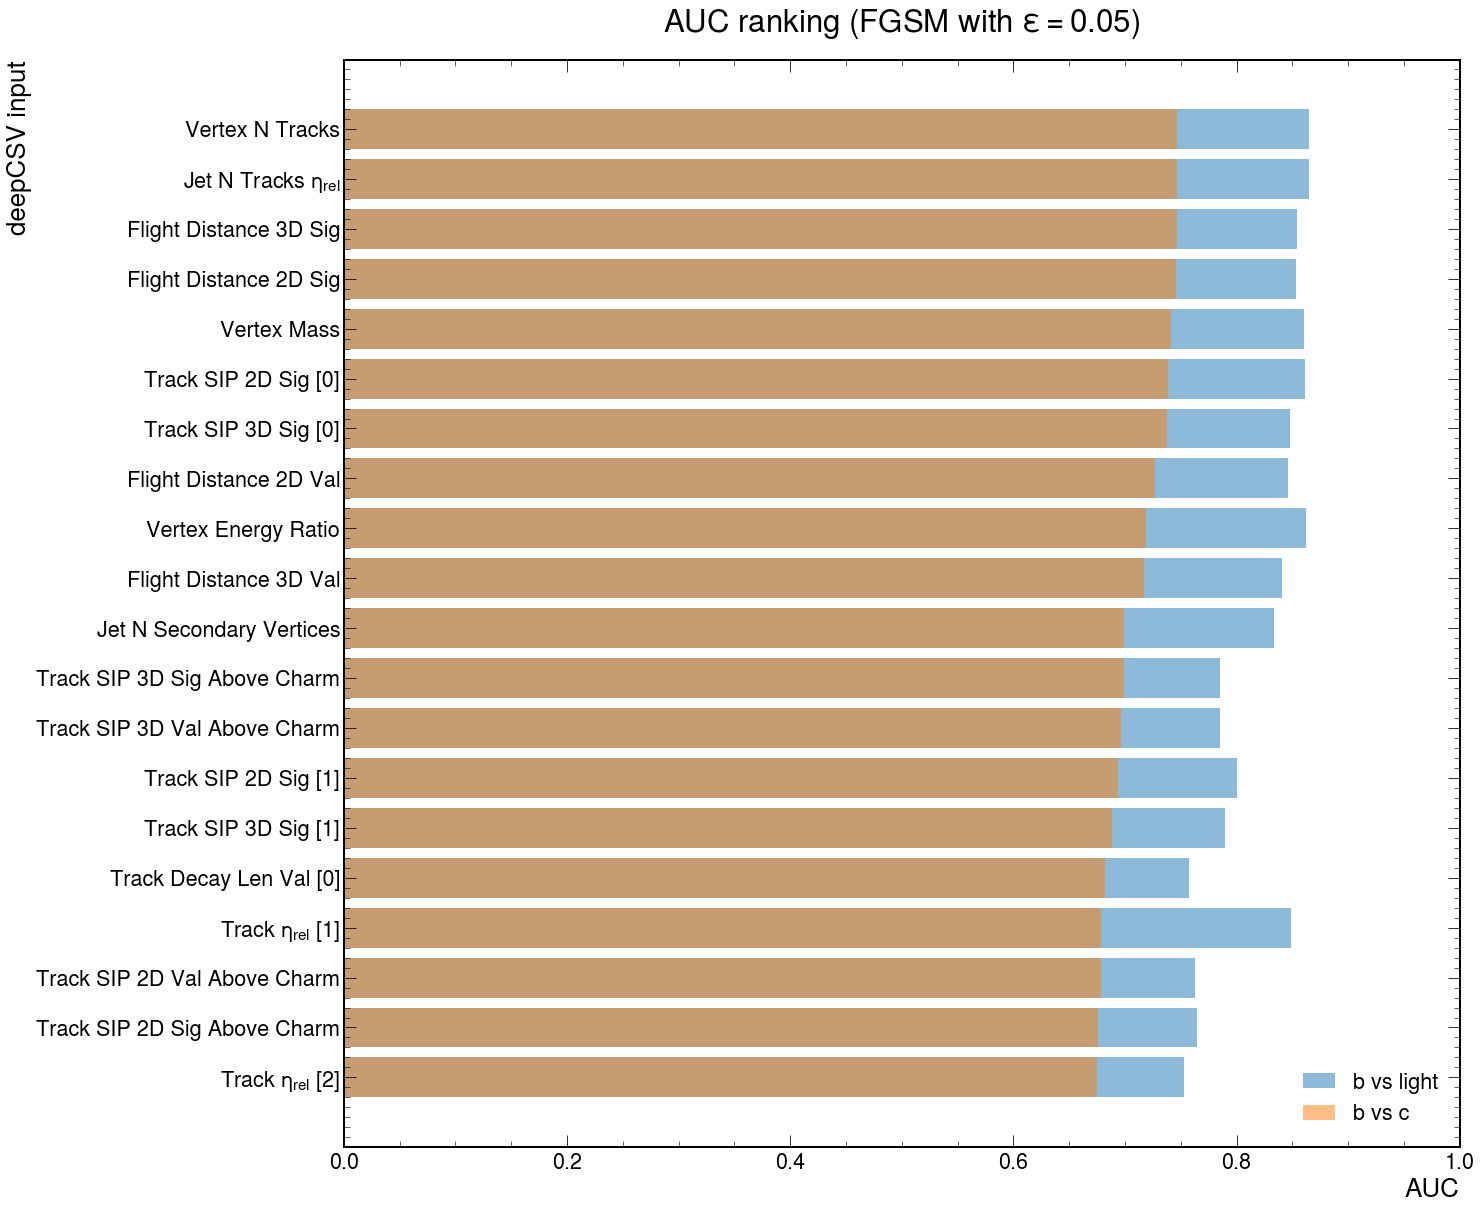

In [52]:
plot_ranking(df_fgsm,'FGSM',0.05)
plot_sorted(df_fgsm.sort_values('auc_bvl'),'FGSM','bvl',0.05)
plot_sorted(df_fgsm.sort_values('auc_bvc'),'FGSM','bvc',0.05)

In [35]:
df_raw

input_name   auc_bvl   auc_bvc
0                  Jet $\eta$  0.501823  0.501224
1                   Jet $p_T$  0.692758  0.588175
2      Flight Distance 2D Sig  0.857151  0.756830
3      Flight Distance 2D Val  0.847053  0.727456
4      Flight Distance 3D Sig  0.857239  0.757066
..                        ...       ...       ...
62                Vertex Mass  0.862435  0.751136
63   Jet N Secondary Vertices  0.833380  0.699002
64      Jet N Selected Tracks  0.689193  0.576777
65  Jet N Tracks $\eta_{rel}$  0.864961  0.747109
66            Vertex N Tracks  0.864961  0.747109

[67 rows x 3 columns]

In [36]:
df_noise

input_name   auc_bvl   auc_bvc
0                  Jet $\eta$  0.501850  0.501245
1                   Jet $p_T$  0.691333  0.587551
2      Flight Distance 2D Sig  0.855847  0.755130
3      Flight Distance 2D Val  0.846700  0.727073
4      Flight Distance 3D Sig  0.855870  0.755397
..                        ...       ...       ...
62                Vertex Mass  0.861923  0.749545
63   Jet N Secondary Vertices  0.833380  0.699002
64      Jet N Selected Tracks  0.689193  0.576777
65  Jet N Tracks $\eta_{rel}$  0.864961  0.747109
66            Vertex N Tracks  0.864961  0.747109

[67 rows x 3 columns]

In [15]:
df_fgsm

input_name   auc_bvl   auc_bvc
0                  Jet $\eta$  0.502461  0.500567
1                   Jet $p_T$  0.695352  0.586450
2      Flight Distance 2D Sig  0.852918  0.746078
3      Flight Distance 2D Val  0.845839  0.727323
4      Flight Distance 3D Sig  0.853917  0.746764
..                        ...       ...       ...
62                Vertex Mass  0.860409  0.741576
63   Jet N Secondary Vertices  0.833380  0.699002
64      Jet N Selected Tracks  0.689193  0.576777
65  Jet N Tracks $\eta_{rel}$  0.864961  0.747109
66            Vertex N Tracks  0.864961  0.747109

[67 rows x 3 columns]

In [22]:
noise_raw_005_bvl = df_noise['auc_bvl']/df_raw['auc_bvl'].to_numpy()
noise_raw_005_bvc = df_noise['auc_bvc']/df_raw['auc_bvc'].to_numpy()

In [16]:
fgsm_raw_005_bvl = df_fgsm['auc_bvl']/df_raw['auc_bvl'].to_numpy()
fgsm_raw_005_bvc = df_fgsm['auc_bvc']/df_raw['auc_bvc'].to_numpy()

In [17]:
jetINDEX = [0,1,28,41,48,49,56,57,58,59,63,64,65] 
trackINDEX = [6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,29,30,31,32,33,34,35,36,37,38,39,40,42,43,44,45,46,47,50,51,52,53,54,55,]
svINDEX = [2,3,4,5,60,61,62,66]

In [18]:
display_names = ['Jet $\eta$',
                'Jet $p_T$',
                'Flight Distance 2D Sig','Flight Distance 2D Val','Flight Distance 3D Sig', 'Flight Distance 3D Val',
                'Track Decay Len Val [0]','Track Decay Len Val [1]','Track Decay Len Val [2]','Track Decay Len Val [3]','Track Decay Len Val [4]','Track Decay Len Val [5]',
                'Track $\Delta R$ [0]','Track $\Delta R$ [1]','Track $\Delta R$ [2]','Track $\Delta R$ [3]','Track $\Delta R$ [4]','Track $\Delta R$ [5]',
                'Track $\eta_{rel}$ [0]','Track $\eta_{rel}$ [1]','Track $\eta_{rel}$ [2]','Track $\eta_{rel}$ [3]',
                'Track Jet Dist Val [0]','Track Jet Dist Val [1]','Track Jet Dist Val [2]','Track Jet Dist Val [3]','Track Jet Dist Val [4]','Track Jet Dist Val [5]',
                'Track Jet $p_T$',
                'Track $p_T$ Ratio [0]','Track $p_T$ Ratio [1]','Track $p_T$ Ratio [2]','Track $p_T$ Ratio [3]','Track $p_T$ Ratio [4]','Track $p_T$ Ratio [5]',
                'Track $p_{T,rel}$ [0]','Track $p_{T,rel}$ [1]','Track $p_{T,rel}$ [2]','Track $p_{T,rel}$ [3]','Track $p_{T,rel}$ [4]','Track $p_{T,rel}$ [5]',
                'Track SIP 2D Sig Above Charm',
                'Track SIP 2D Sig [0]','Track SIP 2D Sig [1]','Track SIP 2D Sig [2]','Track SIP 2D Sig [3]','Track SIP 2D Sig [4]','Track SIP 2D Sig [5]',
                'Track SIP 2D Val Above Charm',
                'Track SIP 3D Sig Above Charm',
                'Track SIP 3D Sig [0]','Track SIP 3D Sig [1]','Track SIP 3D Sig [2]','Track SIP 3D Sig [3]','Track SIP 3D Sig [4]','Track SIP 3D Sig [5]',
                'Track SIP 3D Val Above Charm',
                'Track Sum Jet $\Delta R$','Track Sum Jet $E_T$ Ratio',
                'Vertex Category','Vertex Energy Ratio','Vertex Jet $\Delta R$','Vertex Mass',
                'Jet N Secondary Vertices','Jet N Selected Tracks','Jet N Tracks $\eta_{rel}$','Vertex N Tracks']

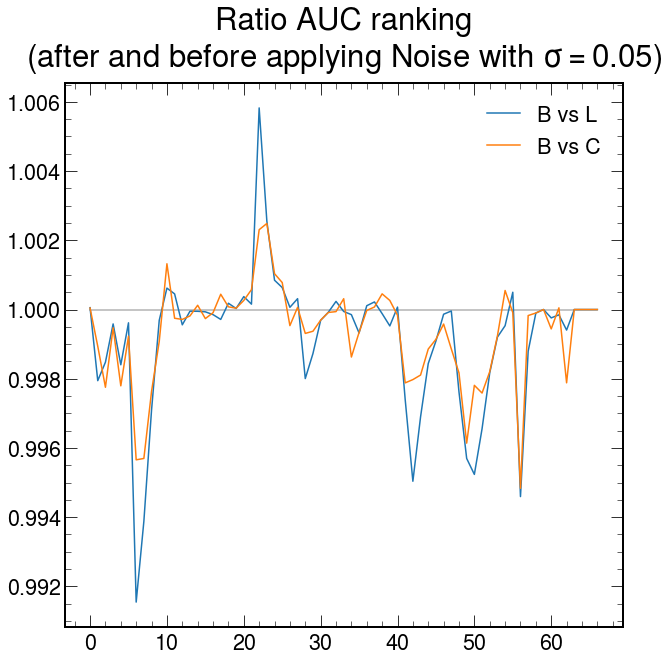

In [63]:
plt.plot(np.ones(67), alpha=0.3, color='black')
plt.plot(df_noise['auc_bvl']/df_raw['auc_bvl'], label='B vs L')
plt.plot(df_noise['auc_bvc']/df_raw['auc_bvc'], label='B vs C')
plt.title(f'Ratio AUC ranking\n(after and before applying Noise with $\sigma=0.05$)', y=1.02)
plt.legend()
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_prototype_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

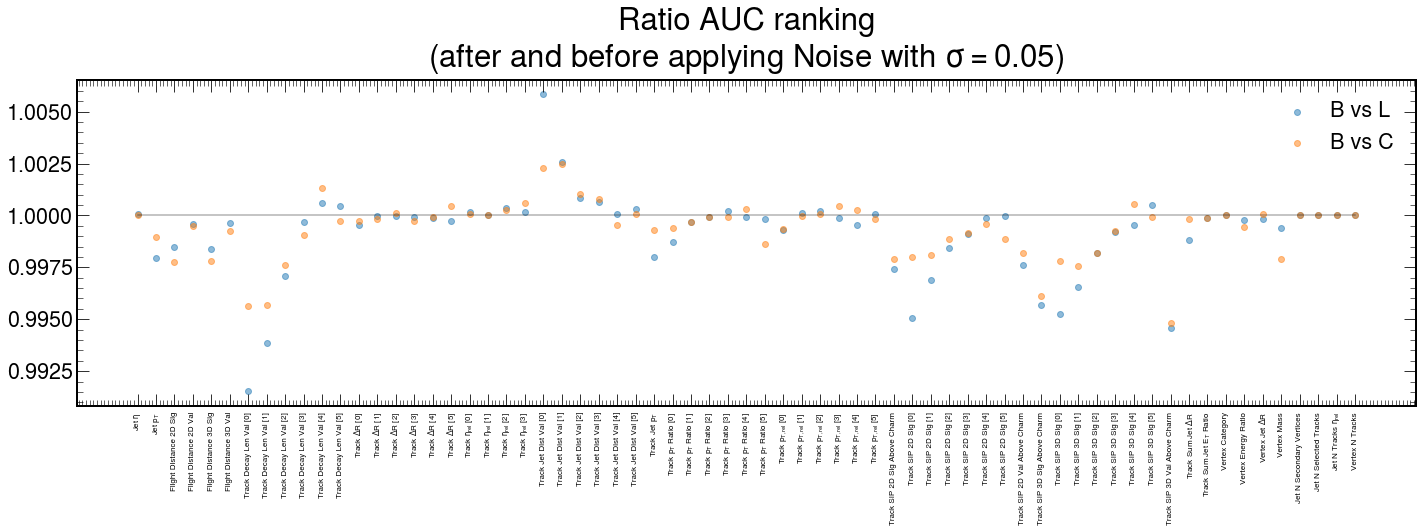

In [64]:
fig, ax = plt.subplots(figsize=(24, 6))
plt.plot(np.ones(67), alpha=0.3, color='black')
plt.scatter(x=df_noise['input_name'],y=df_noise['auc_bvl']/df_raw['auc_bvl'], alpha=0.5,label='B vs L')
plt.scatter(x=df_noise['input_name'],y=df_noise['auc_bvc']/df_raw['auc_bvc'], alpha=0.5,label='B vs C')
plt.title(f'Ratio AUC ranking\n(after and before applying Noise with $\sigma=0.05$)', y=1.02)
ticksX = np.arange(67)
#ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(display_names, rotation=90, fontsize=8)
#ax.xaxis.set_ticks_position('none') 
plt.legend()
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

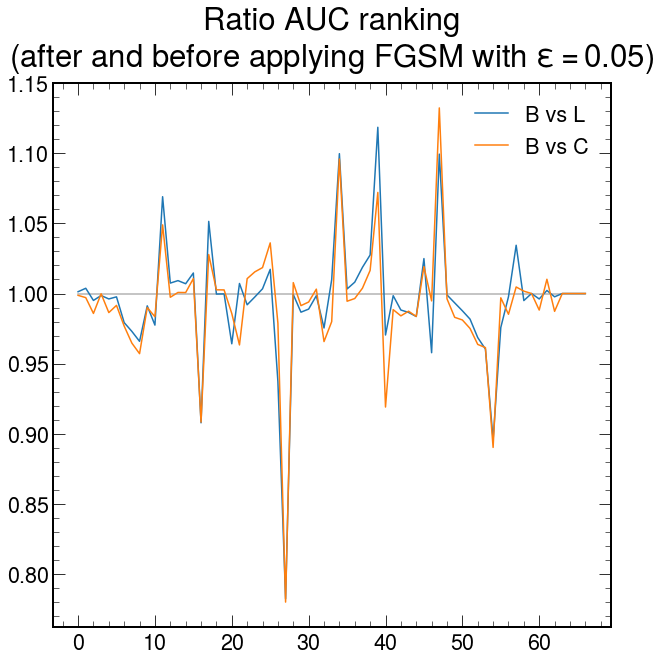

In [65]:
plt.plot(np.ones(67), alpha=0.3, color='black')
plt.plot(df_fgsm['auc_bvl']/df_raw['auc_bvl'], label='B vs L')
plt.plot(df_fgsm['auc_bvc']/df_raw['auc_bvc'], label='B vs C')
plt.title(f'Ratio AUC ranking\n(after and before applying FGSM with $\epsilon=0.05$)', y=1.02)
plt.legend()
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_prototype_NFiles_{NUM_DATASETS}_MODE_fgsm_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

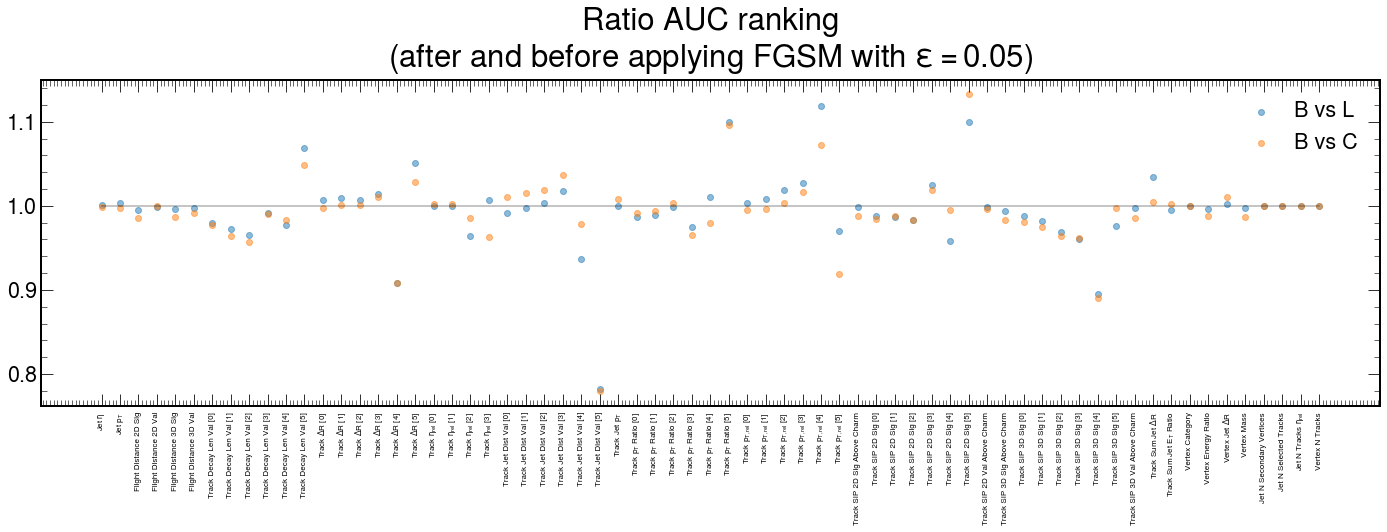

In [66]:
fig, ax = plt.subplots(figsize=(24, 6))
plt.plot(np.ones(67), alpha=0.3, color='black')
plt.scatter(x=df_noise['input_name'],y=df_fgsm['auc_bvl']/df_raw['auc_bvl'], alpha=0.5,label='B vs L')
plt.scatter(x=df_noise['input_name'],y=df_fgsm['auc_bvc']/df_raw['auc_bvc'], alpha=0.5,label='B vs C')
plt.title(f'Ratio AUC ranking\n(after and before applying FGSM with $\epsilon=0.05$)', y=1.02)
ticksX = np.arange(67)
#ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(display_names, rotation=90, fontsize=8)
#ax.xaxis.set_ticks_position('none') 
plt.legend()
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_MODE_noise_PARAM_0.05.svg', bbox_inches='tight', facecolor='w', transparent=False)

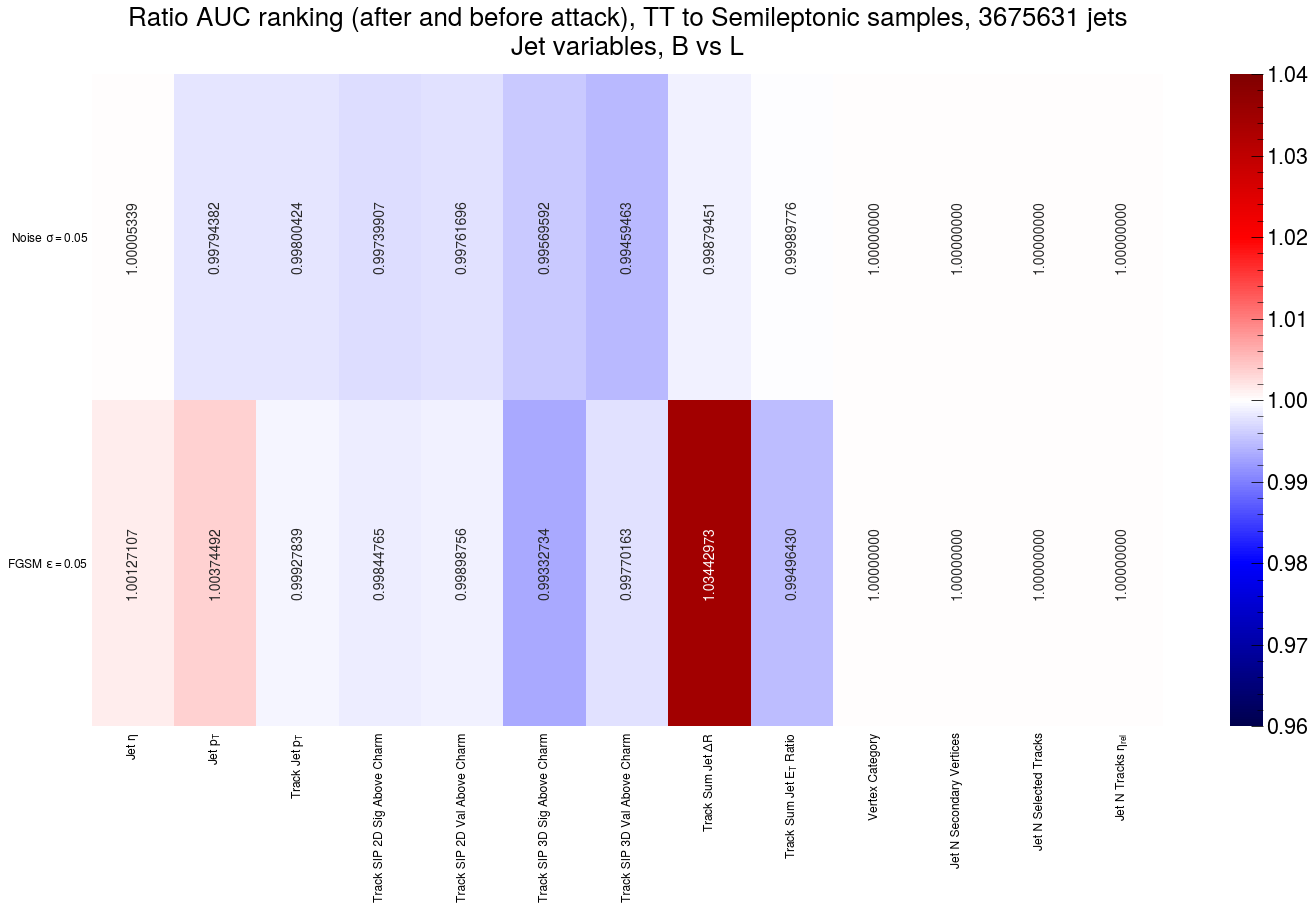

In [67]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvl[jetINDEX], fgsm_raw_005_bvl[jetINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.96, vmax=1.04,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(jetINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[jetINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nJet variables, B vs L', size=26, y=1.02)
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_JET_BvL.svg', bbox_inches='tight', facecolor='w', transparent=False)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_ratio.svg', bbox_inches='tight', facecolor='w', transparent=False)

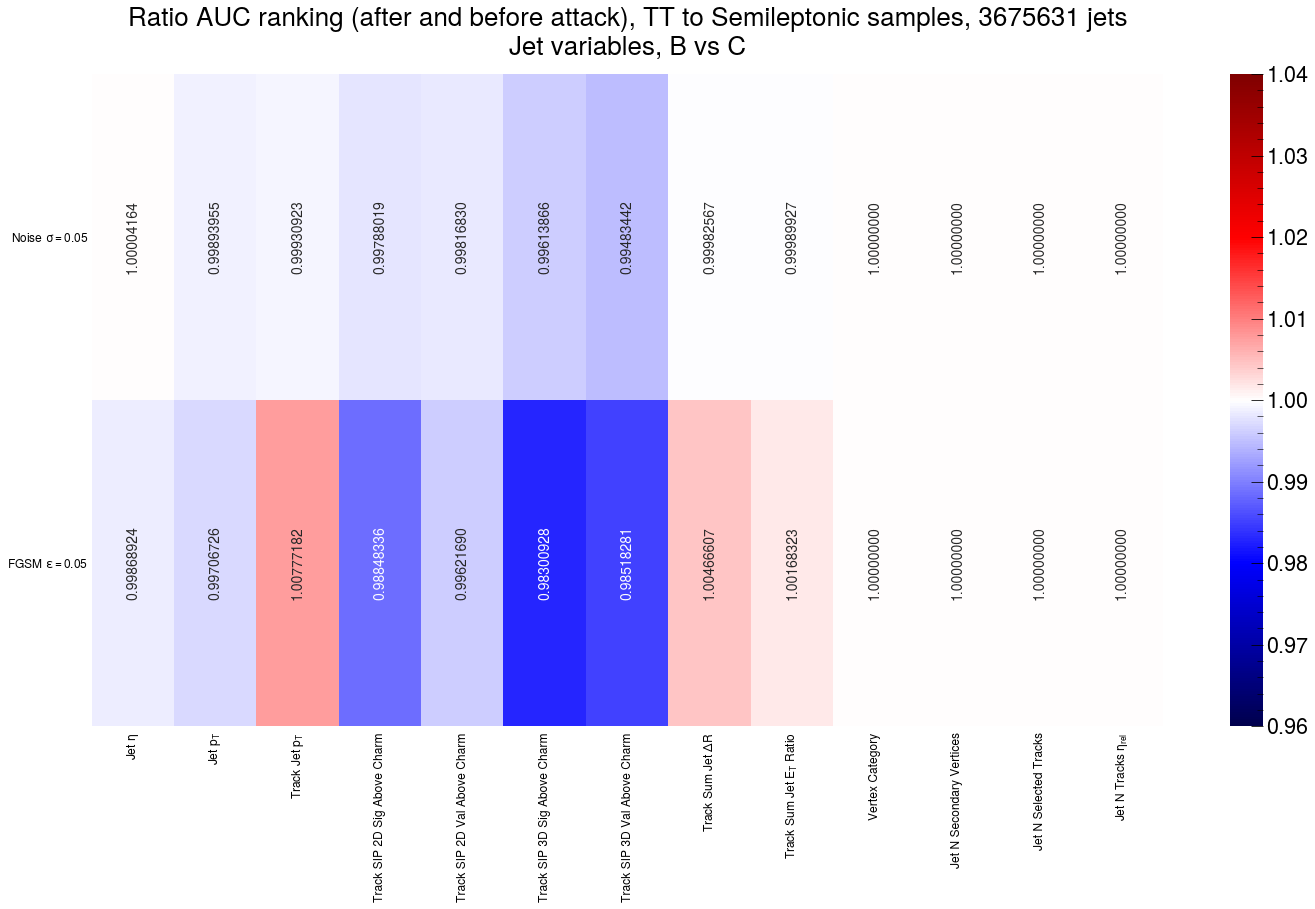

In [68]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvc[jetINDEX], fgsm_raw_005_bvc[jetINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.96, vmax=1.04,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(jetINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[jetINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nJet variables, B vs C', size=26, y=1.02)
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_JET_BvC.svg', bbox_inches='tight', facecolor='w', transparent=False)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_ratio.svg', bbox_inches='tight', facecolor='w', transparent=False)

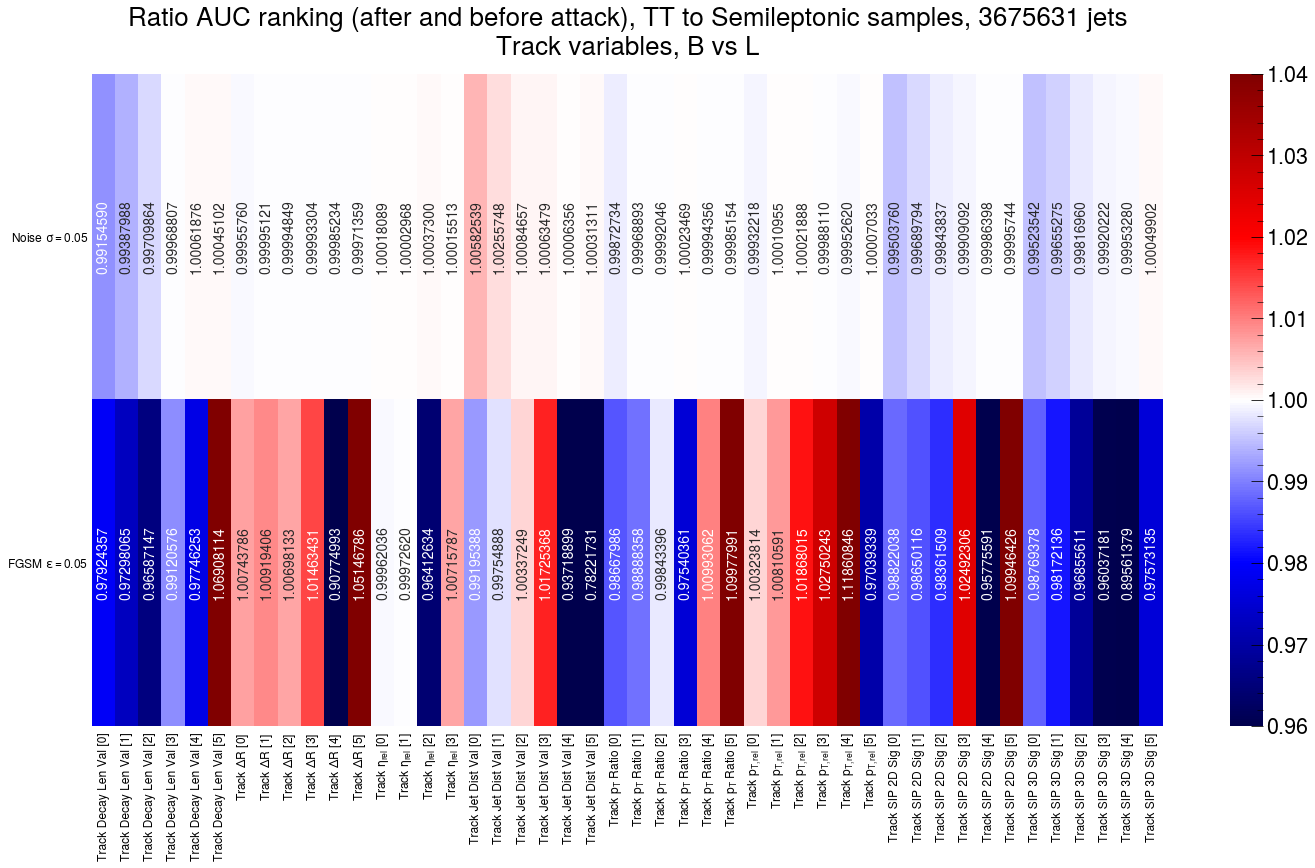

In [69]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvl[trackINDEX], fgsm_raw_005_bvl[trackINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.96, vmax=1.04,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(trackINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[trackINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nTrack variables, B vs L', size=26, y=1.02)
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_TRACK_BvL.svg', bbox_inches='tight', facecolor='w', transparent=False)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_ratio.svg', bbox_inches='tight', facecolor='w', transparent=False)

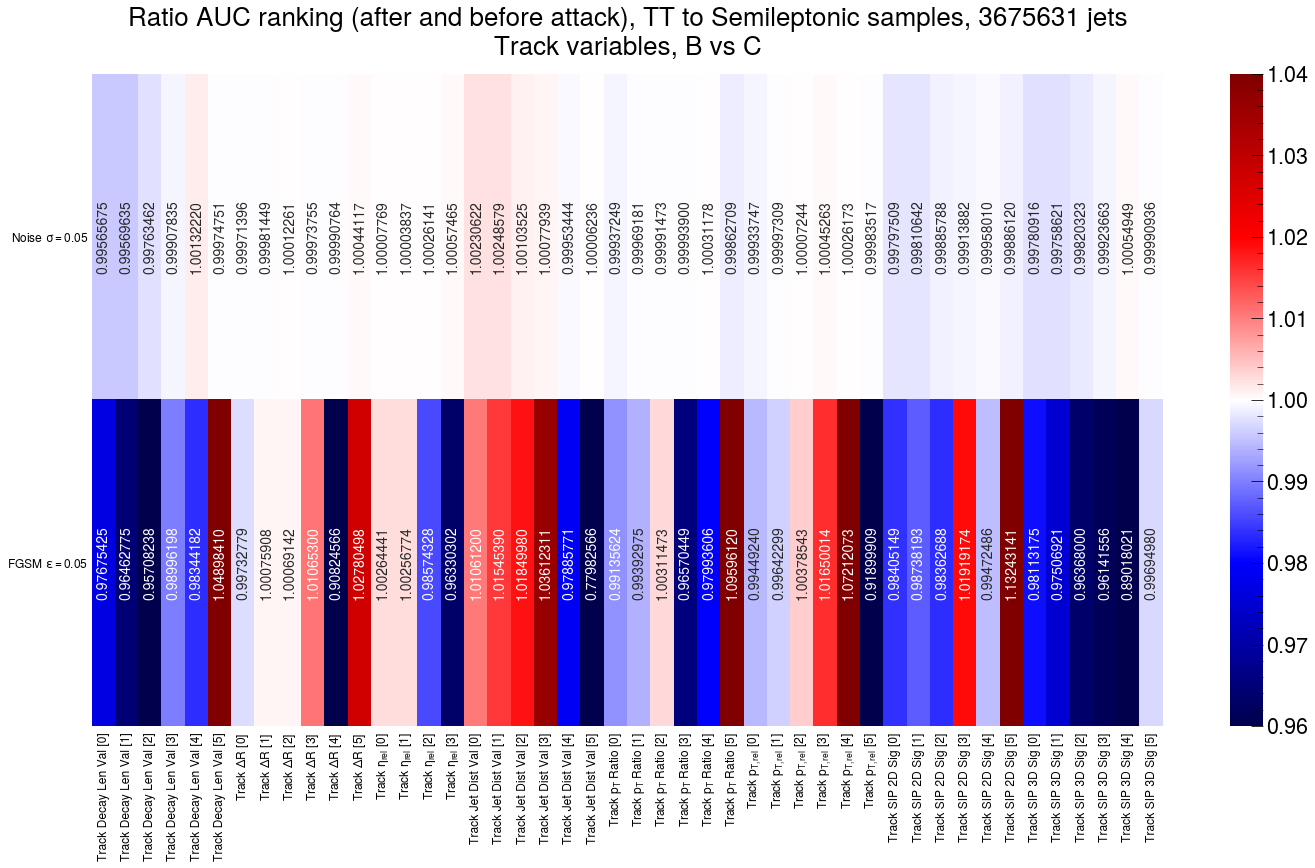

In [70]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvc[trackINDEX], fgsm_raw_005_bvc[trackINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.96, vmax=1.04,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(trackINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[trackINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nTrack variables, B vs C', size=26, y=1.02)
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_TRACK_BvC.svg', bbox_inches='tight', facecolor='w', transparent=False)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_ratio.svg', bbox_inches='tight', facecolor='w', transparent=False)

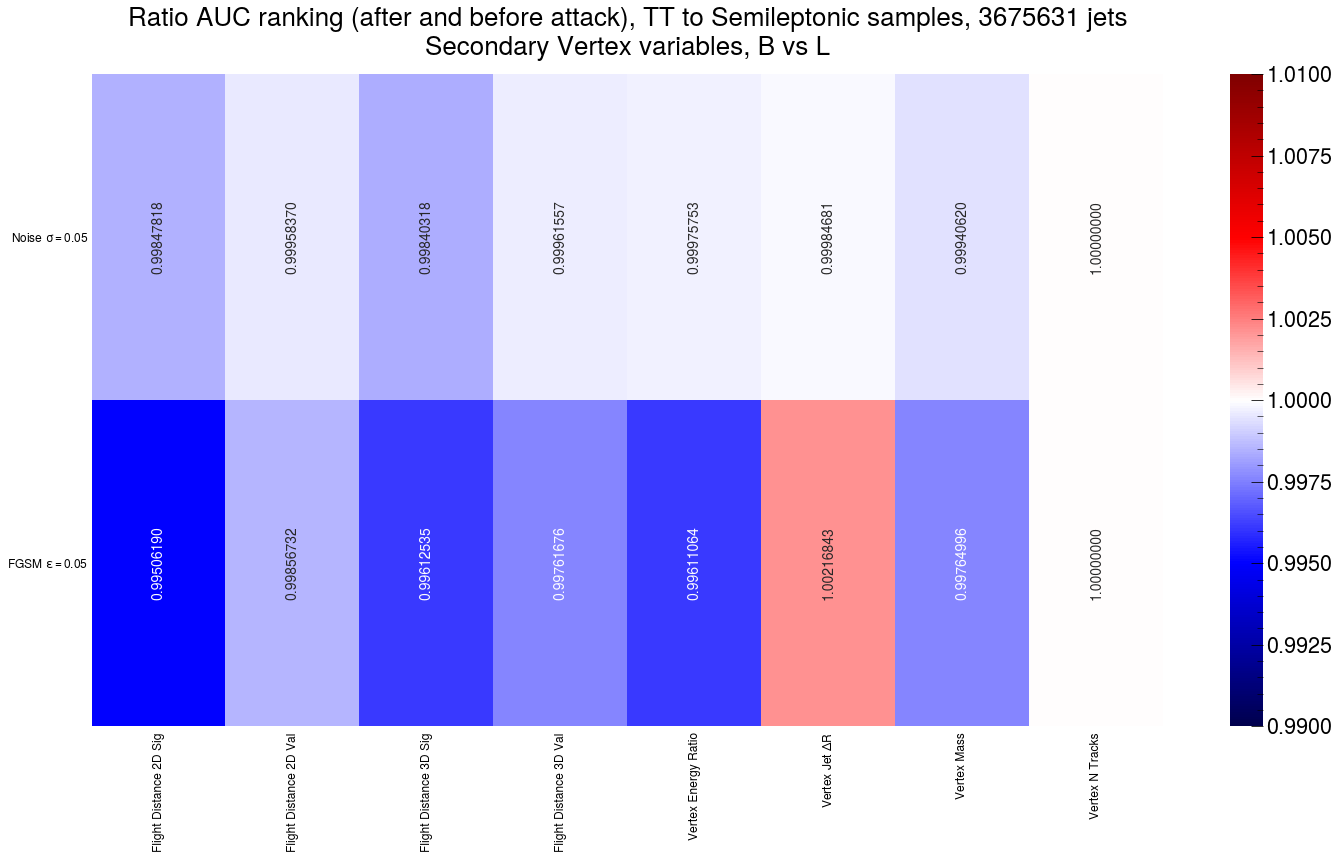

In [71]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvl[svINDEX], fgsm_raw_005_bvl[svINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.99, vmax=1.01,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(svINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[svINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nSecondary Vertex variables, B vs L', size=26, y=1.02)
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_SV_BvL.svg', bbox_inches='tight', facecolor='w', transparent=False)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_ratio.svg', bbox_inches='tight', facecolor='w', transparent=False)

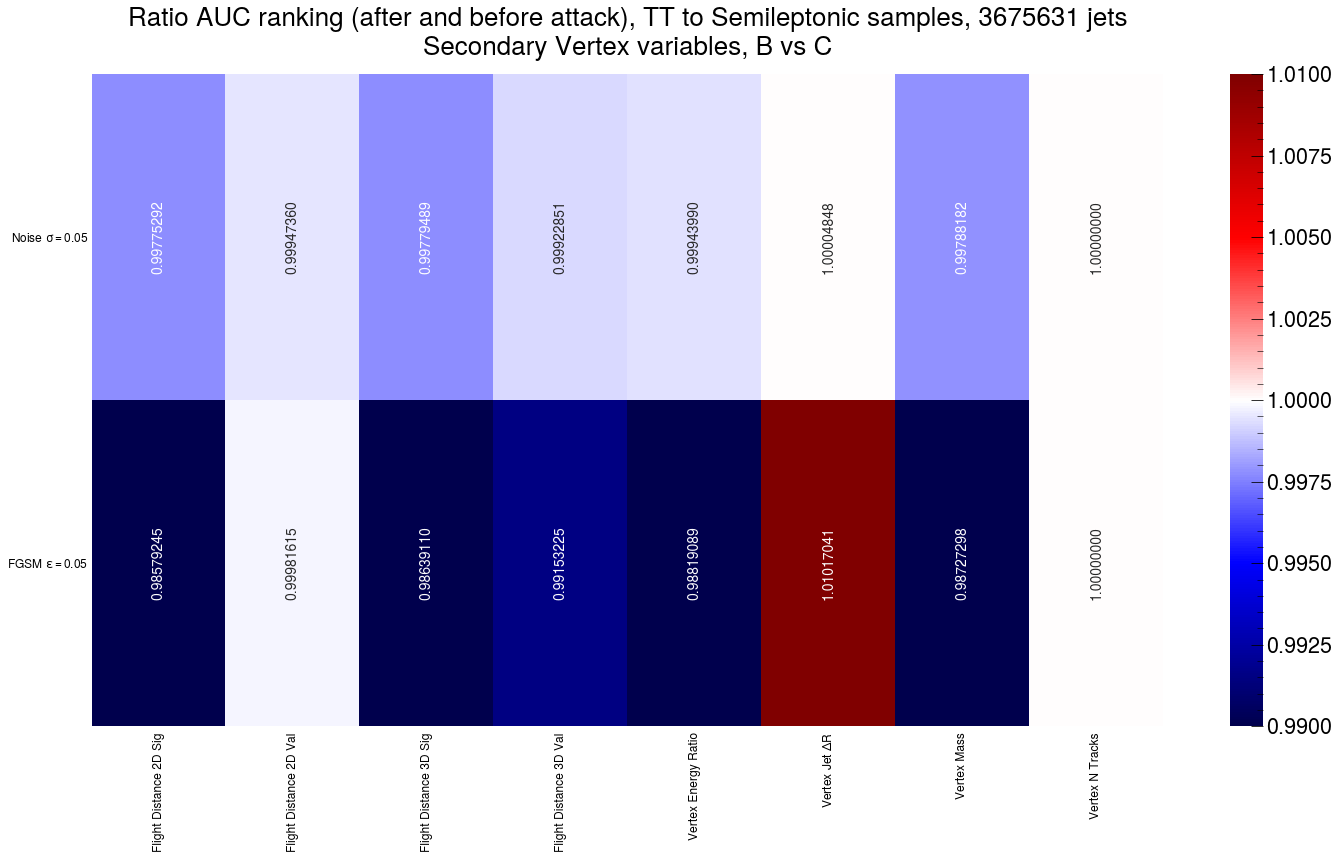

In [72]:
fig, ax = plt.subplots(figsize=(24, 12))
#hep.cms.label(loc=0)

hm = sns.heatmap(np.vstack([noise_raw_005_bvc[svINDEX], fgsm_raw_005_bvc[svINDEX]
                            #, fgsm_0005[jetINDEX], fgsm_001[jetINDEX], fgsm_005[jetINDEX], fgsm_01[jetINDEX]
                           ]), cbar=True, vmin=0.99, vmax=1.01,
                 fmt='.8f', annot_kws={'size': 14, 'rotation': 90}, annot=True, 
                 square=False, cmap=plt.cm.seismic)

ticksX = np.arange(len(svINDEX)) + 0.5
ticksY = np.arange(2) + 0.5
ax.set_xticks(ticksX)
ax.set_xticklabels(np.array(display_names)[svINDEX], rotation=90, fontsize=12)
ax.xaxis.set_ticks_position('none') 
ax.set_yticks(ticksY)
ax.set_yticklabels(['Noise $\sigma=0.05$', 'FGSM $\epsilon=0.05$'
                    #,'FGSM $\epsilon=0.005$', 'FGSM $\epsilon=0.01$','FGSM $\epsilon=0.05$', 'FGSM $\epsilon=0.1$'
                   ], rotation=360, fontsize=12)
ax.yaxis.set_ticks_position('none') 
ax.set_title(f'Ratio AUC ranking (after and before attack), TT to Semileptonic samples, 3675631 jets\nSecondary Vertex variables, B vs C', size=26, y=1.02)
plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_RATIO_NFiles_{NUM_DATASETS}_SV_BvC.svg', bbox_inches='tight', facecolor='w', transparent=False)
#plt.savefig(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_ratio.svg', bbox_inches='tight', facecolor='w', transparent=False)

In [73]:
df_parallel_raw = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_raw_PARAM_0.0_PARALLELTEST.pkl')

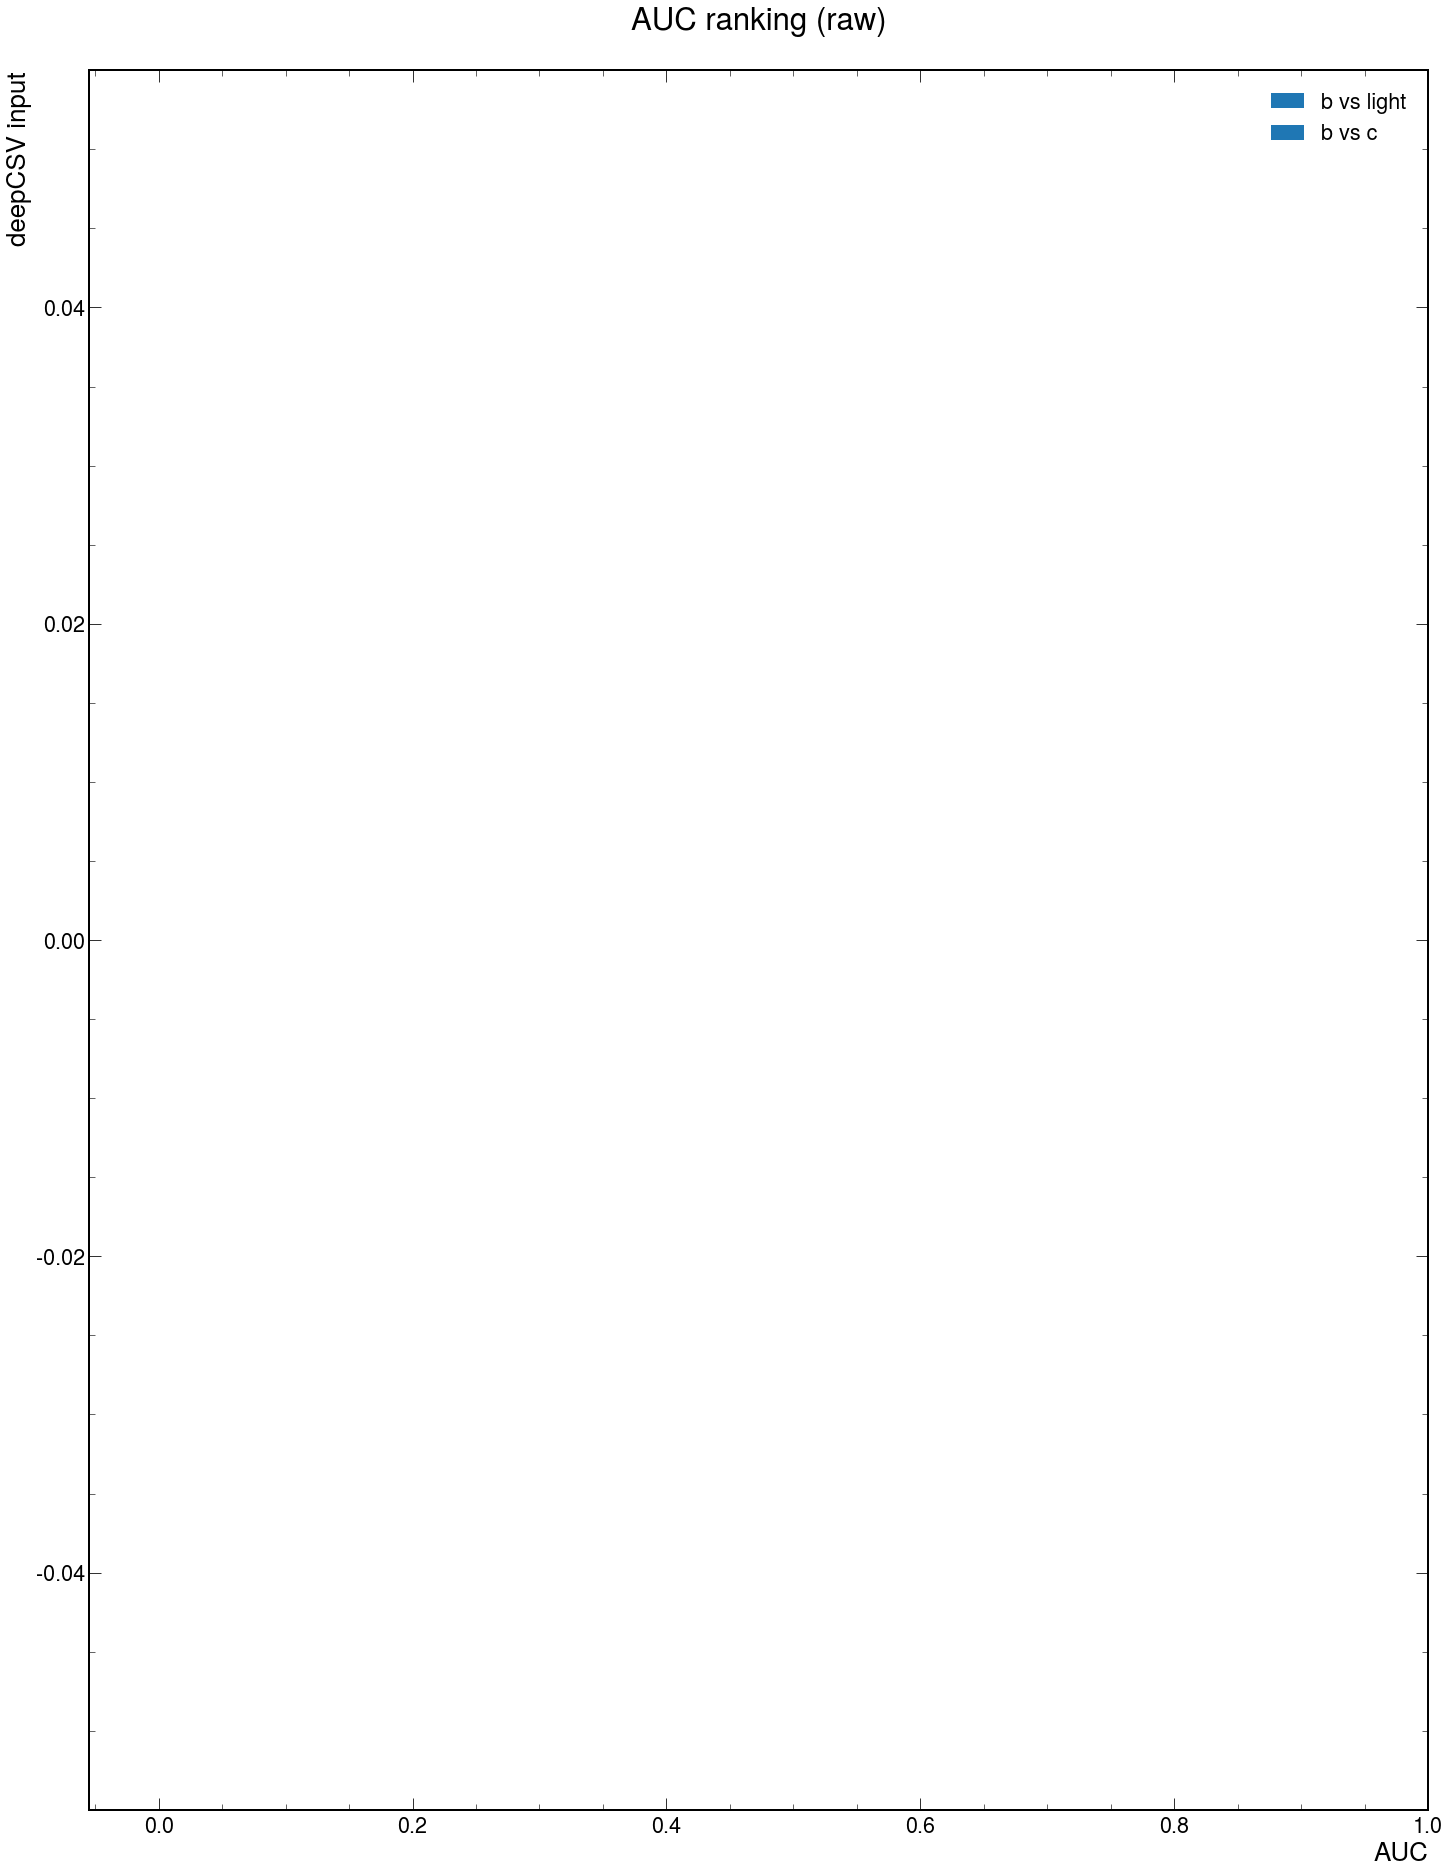

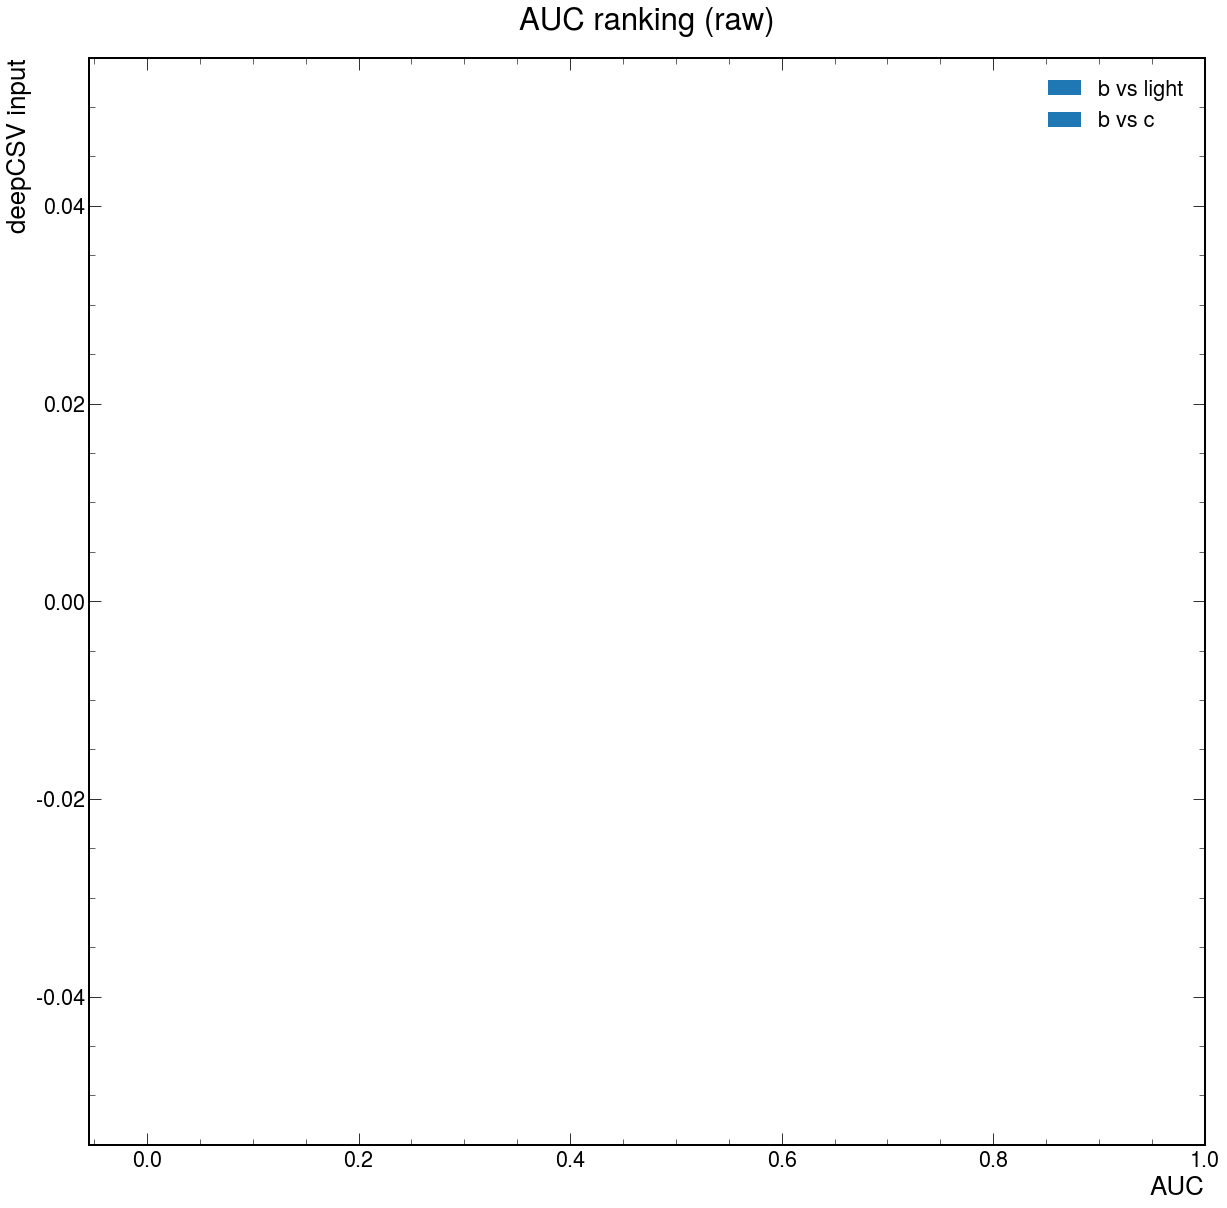

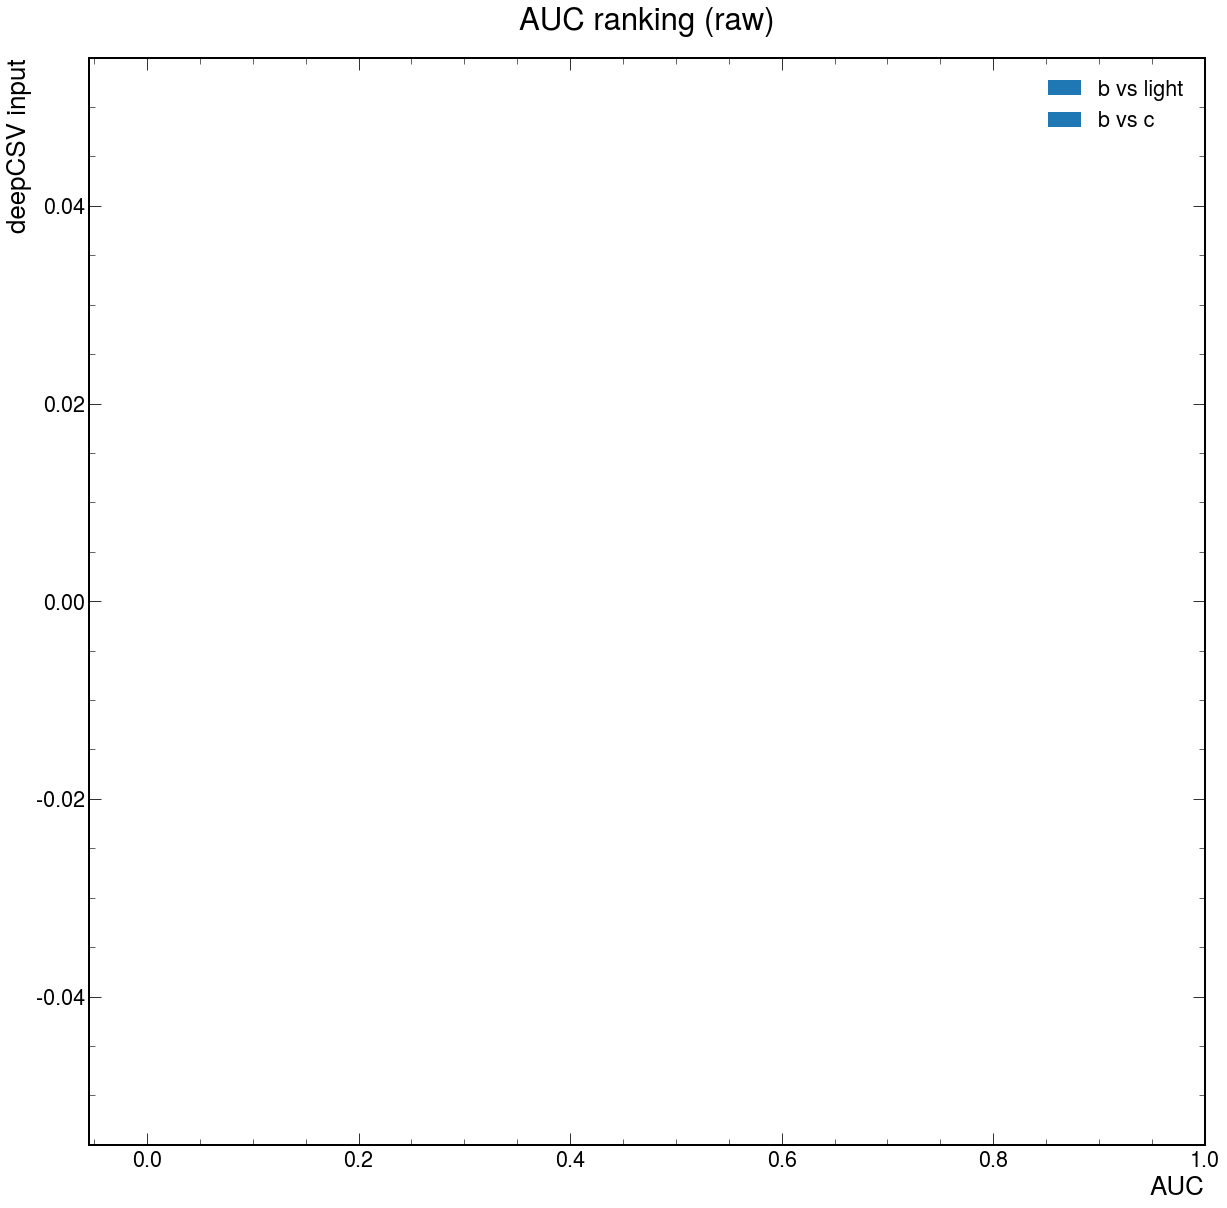

In [74]:
plot_ranking(df_parallel_raw,'raw')
plot_sorted(df_parallel_raw.sort_values('auc_bvl'),'raw','bvl')
plot_sorted(df_parallel_raw.sort_values('auc_bvc'),'raw','bvc')

In [98]:
df_parallel_raw = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_{NUM_DATASETS}_MODE_raw_PARAM_0.0_PARALLELTEST_v2.pkl')

In [99]:
df_parallel_raw

input_name   auc_bvl   auc_bvc
0                  Jet $\eta$  0.501823  0.501224
1                   Jet $p_T$  0.692758  0.588175
2      Flight Distance 2D Sig  0.857151  0.756830
3      Flight Distance 2D Val  0.847053  0.727456
4      Flight Distance 3D Sig  0.857239  0.757066
..                        ...       ...       ...
62                Vertex Mass  0.862435  0.751136
63   Jet N Secondary Vertices  0.833380  0.699002
64      Jet N Selected Tracks  0.689193  0.576777
65  Jet N Tracks $\eta_{rel}$  0.864961  0.747109
66            Vertex N Tracks  0.864961  0.747109

[67 rows x 3 columns]

In [85]:
df_raw

input_name   auc_bvl   auc_bvc
0                  Jet $\eta$  0.501823  0.501224
1                   Jet $p_T$  0.692758  0.588175
2      Flight Distance 2D Sig  0.857151  0.756830
3      Flight Distance 2D Val  0.847053  0.727456
4      Flight Distance 3D Sig  0.857239  0.757066
..                        ...       ...       ...
62                Vertex Mass  0.862435  0.751136
63   Jet N Secondary Vertices  0.833380  0.699002
64      Jet N Selected Tracks  0.689193  0.576777
65  Jet N Tracks $\eta_{rel}$  0.864961  0.747109
66            Vertex N Tracks  0.864961  0.747109

[67 rows x 3 columns]

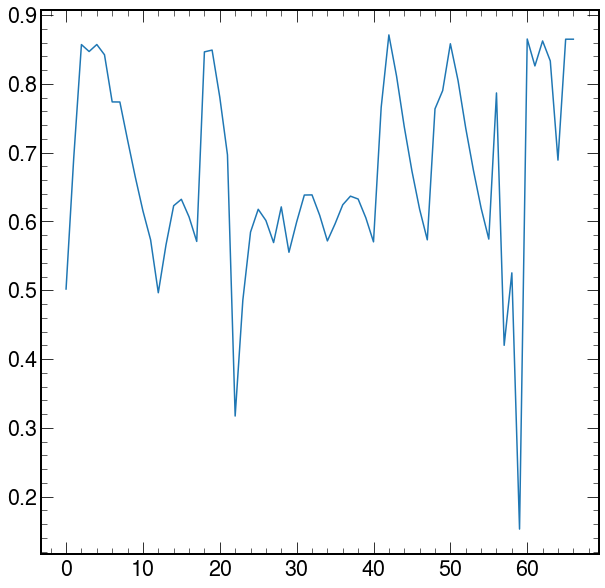

In [100]:
plt.plot(df_parallel_raw['auc_bvl'])

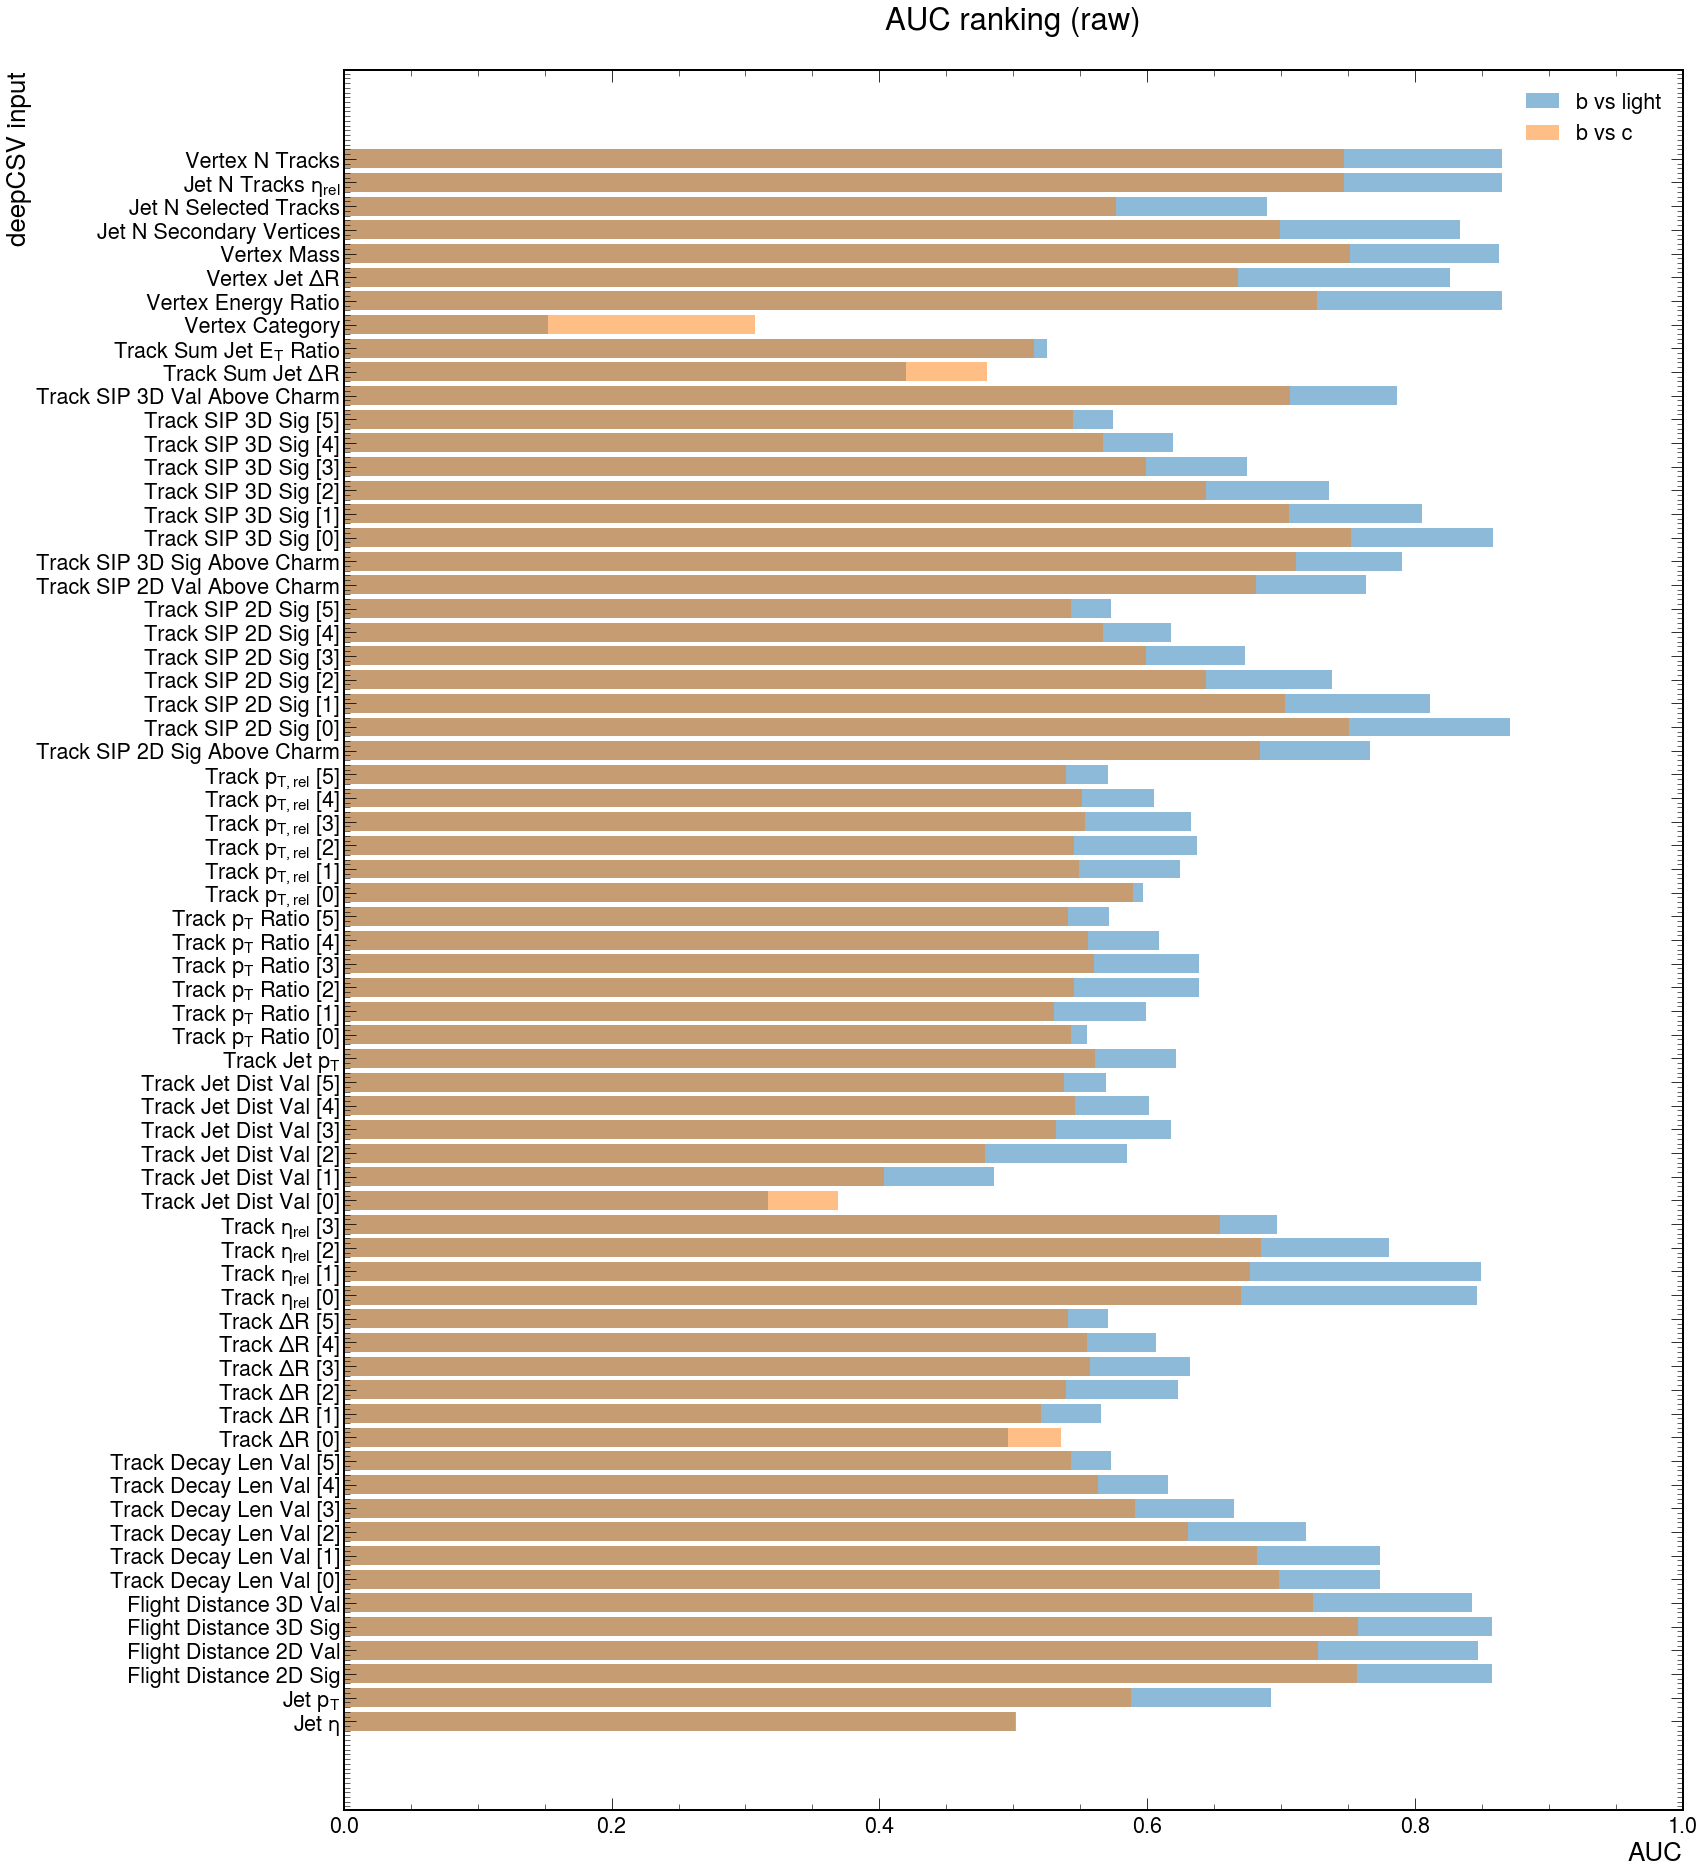

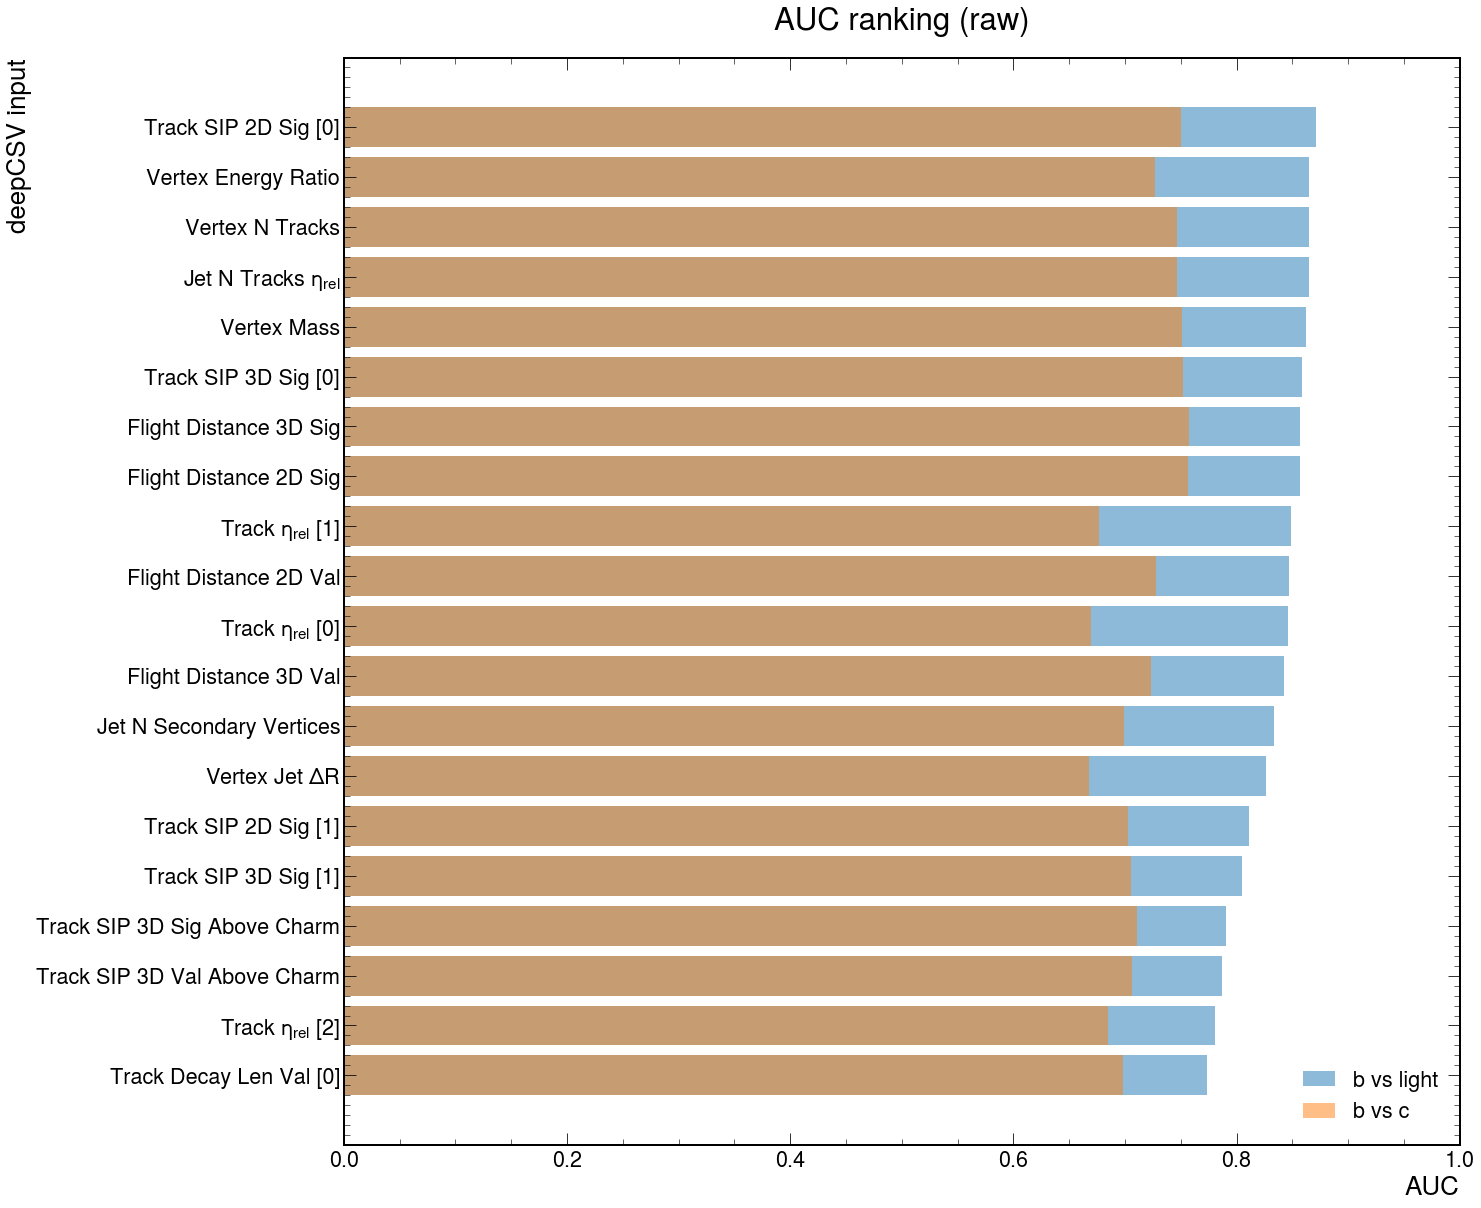

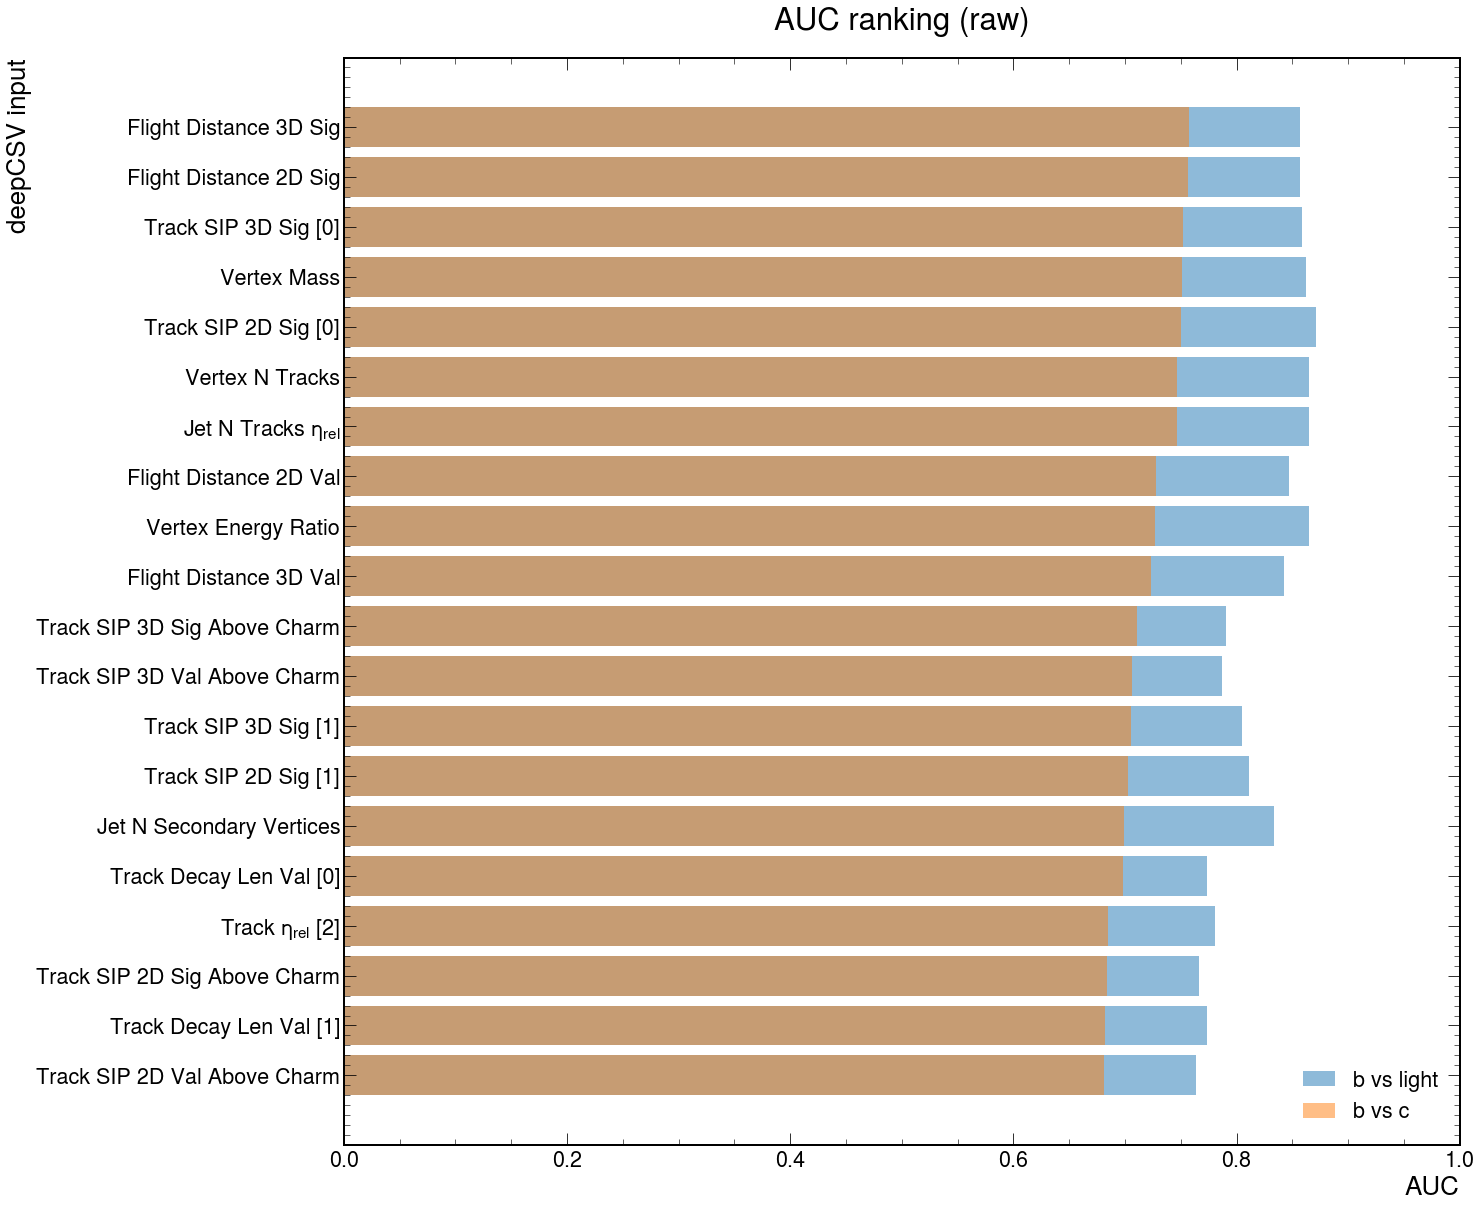

In [101]:
plot_ranking(df_parallel_raw,'raw')
plot_sorted(df_parallel_raw.sort_values('auc_bvl'),'raw','bvl')
plot_sorted(df_parallel_raw.sort_values('auc_bvc'),'raw','bvc')

In [102]:
df_parallel_raw_2 = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_2_MODE_raw_PARAM_0.0_PARALLELTEST_v2.pkl')

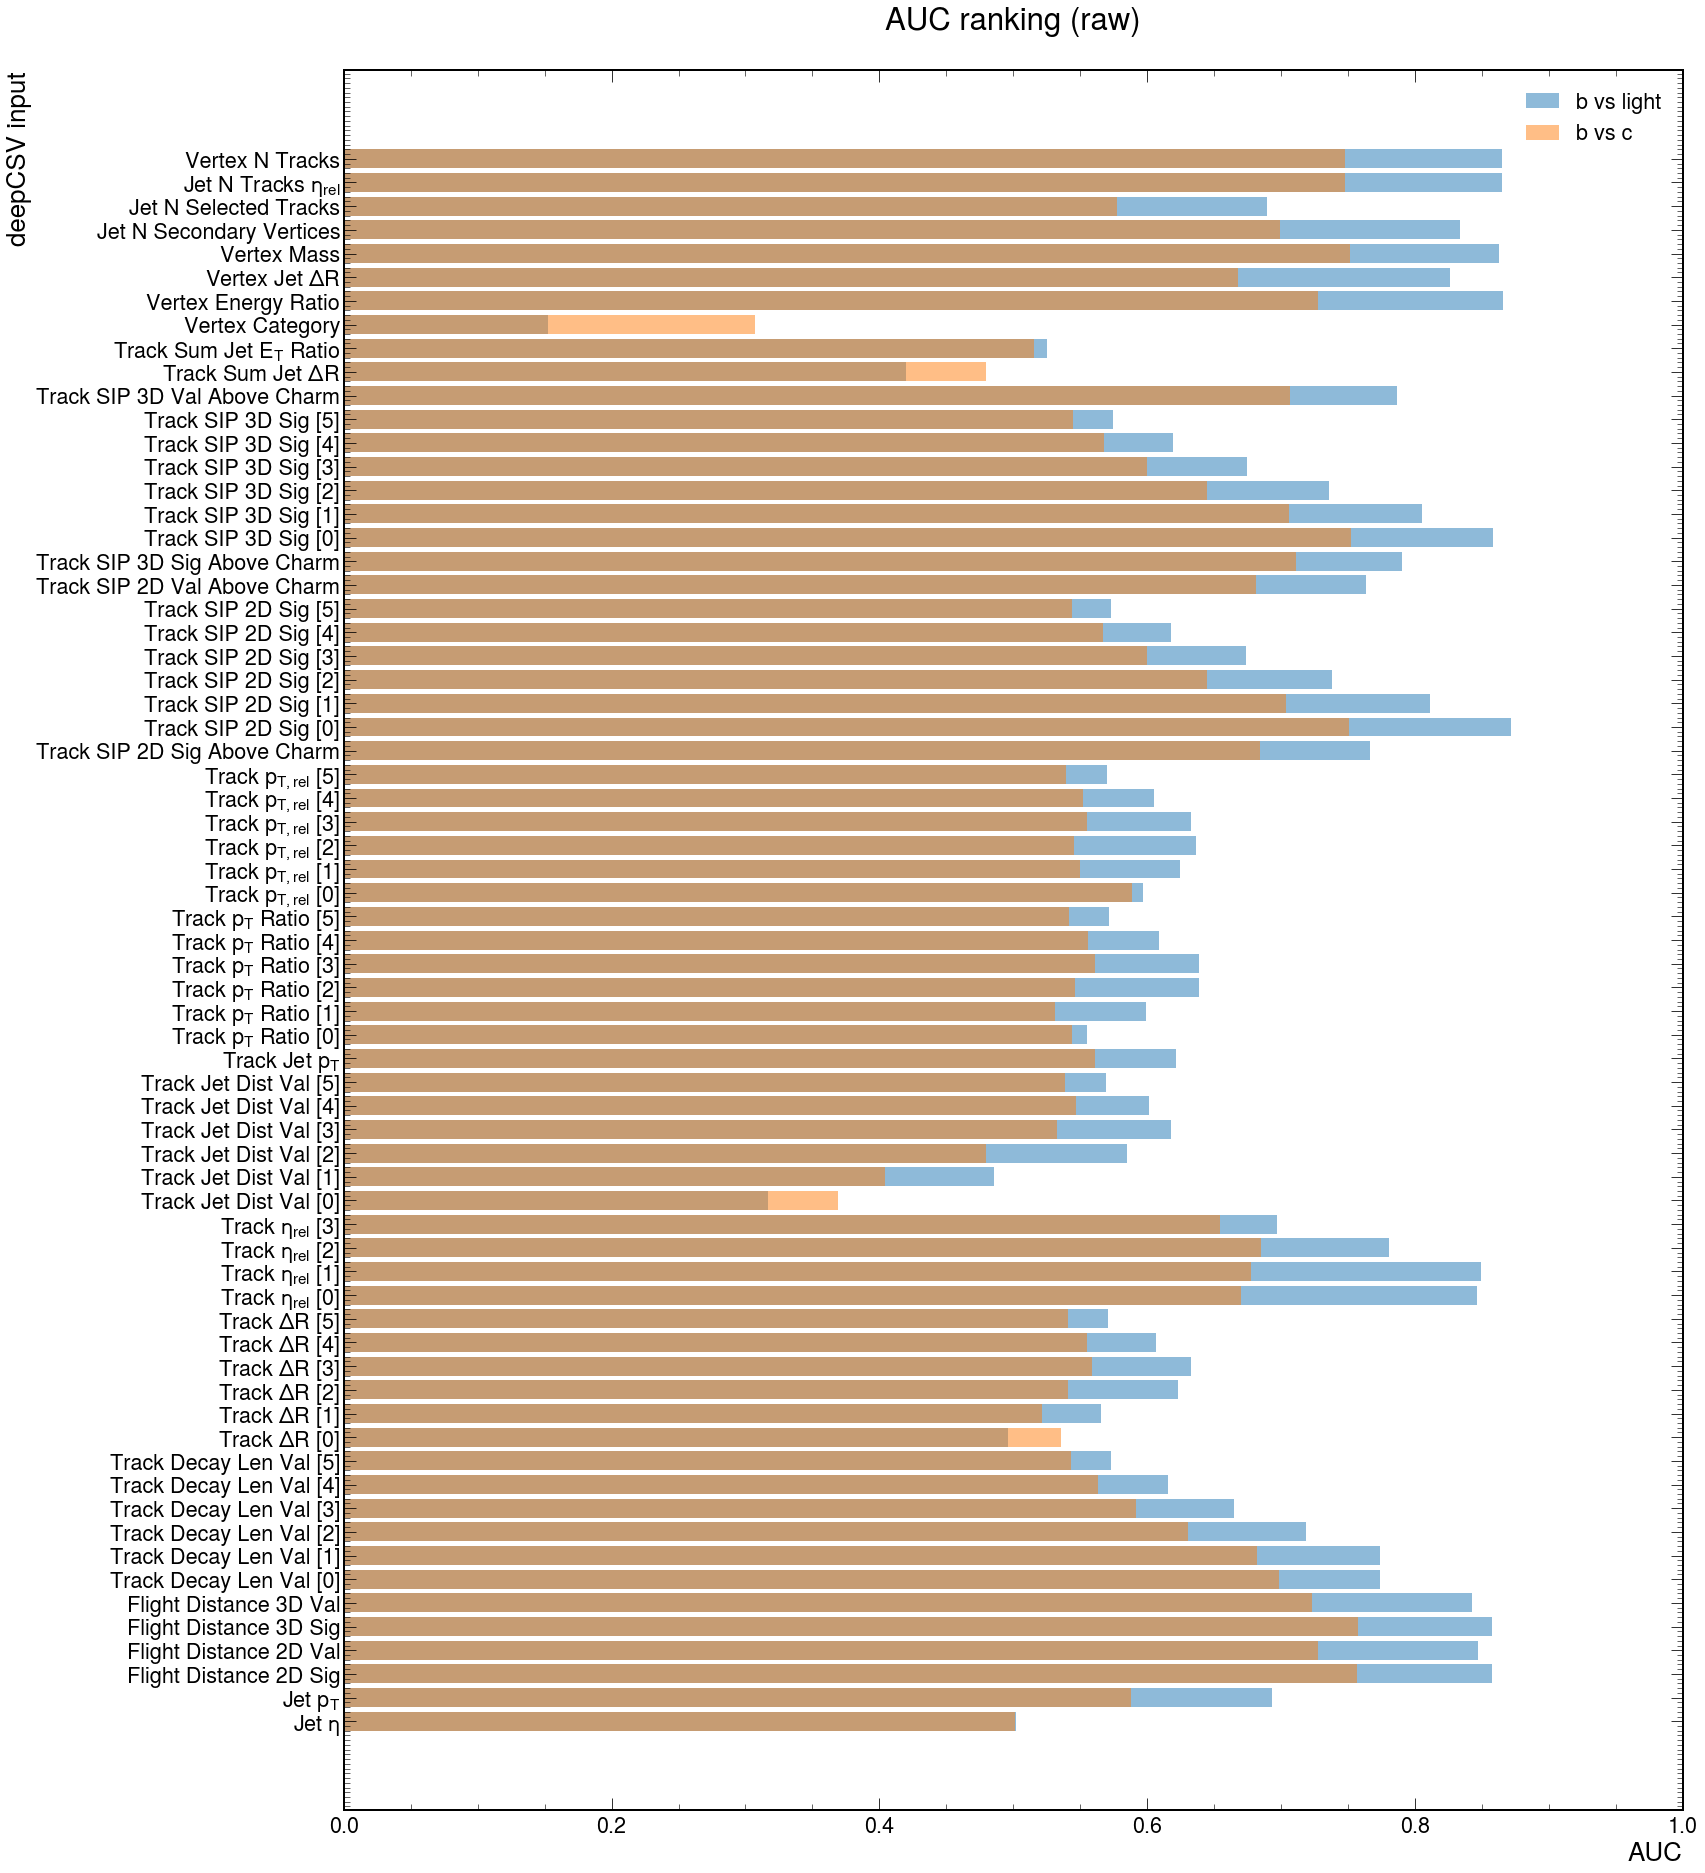

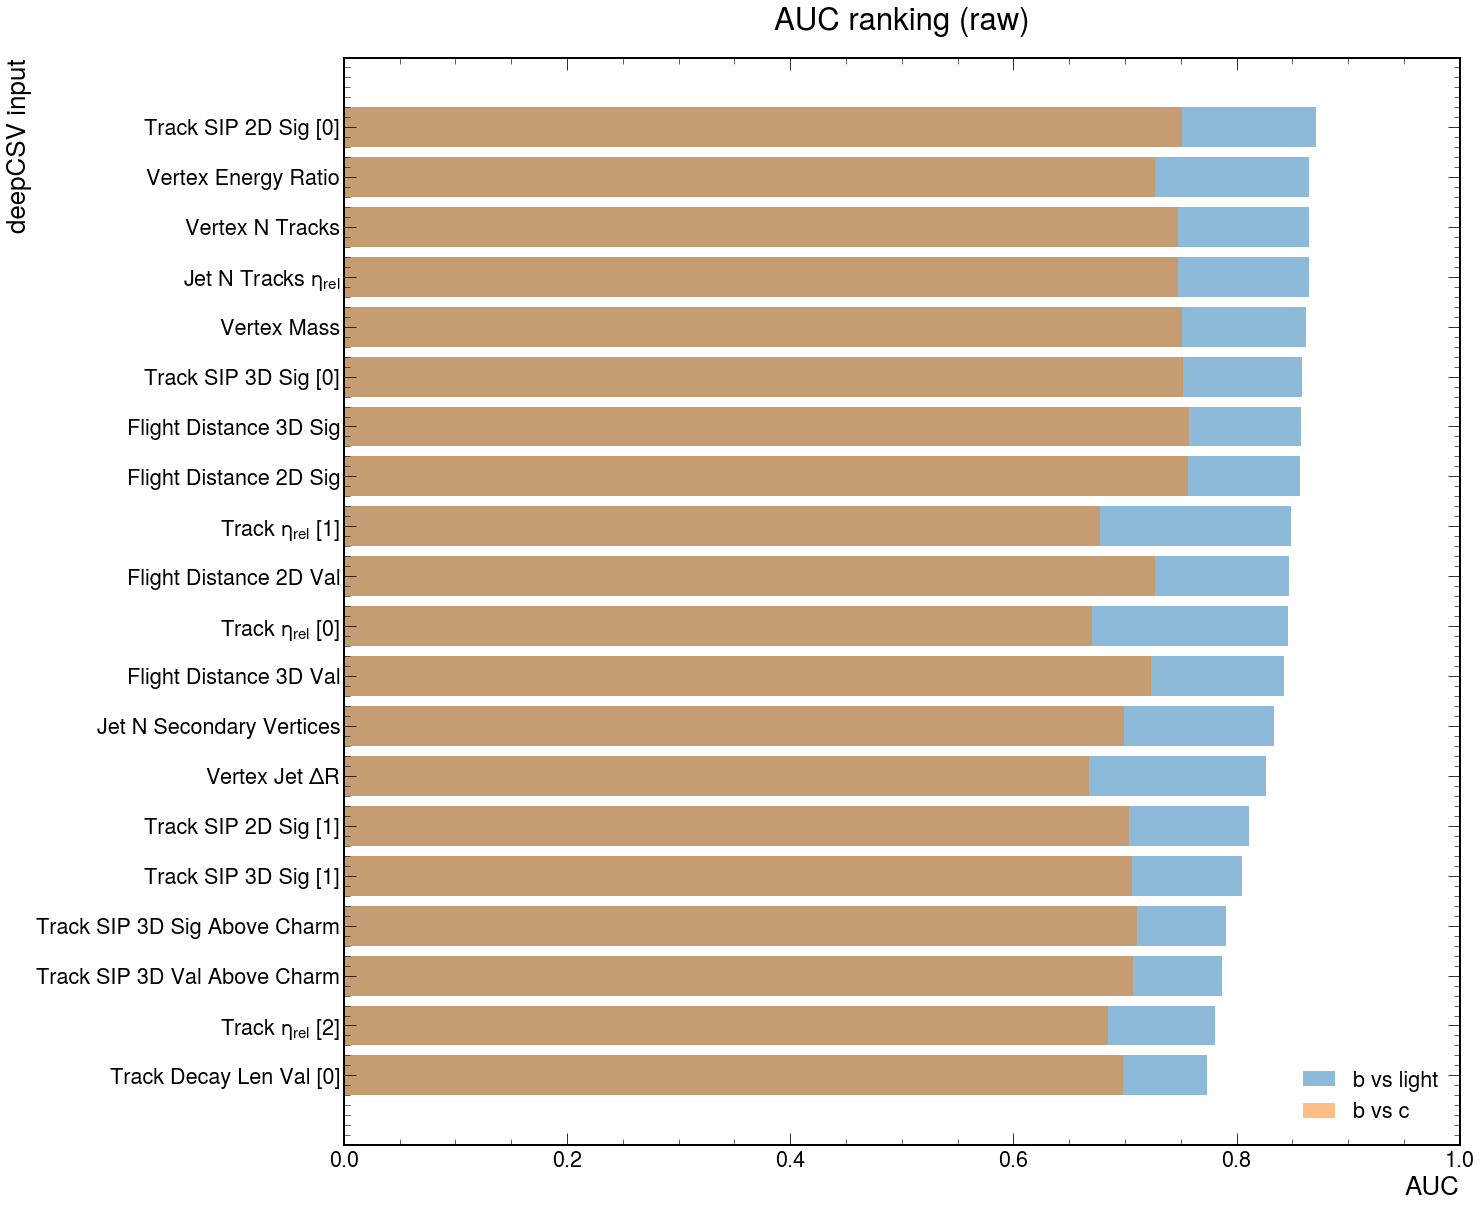

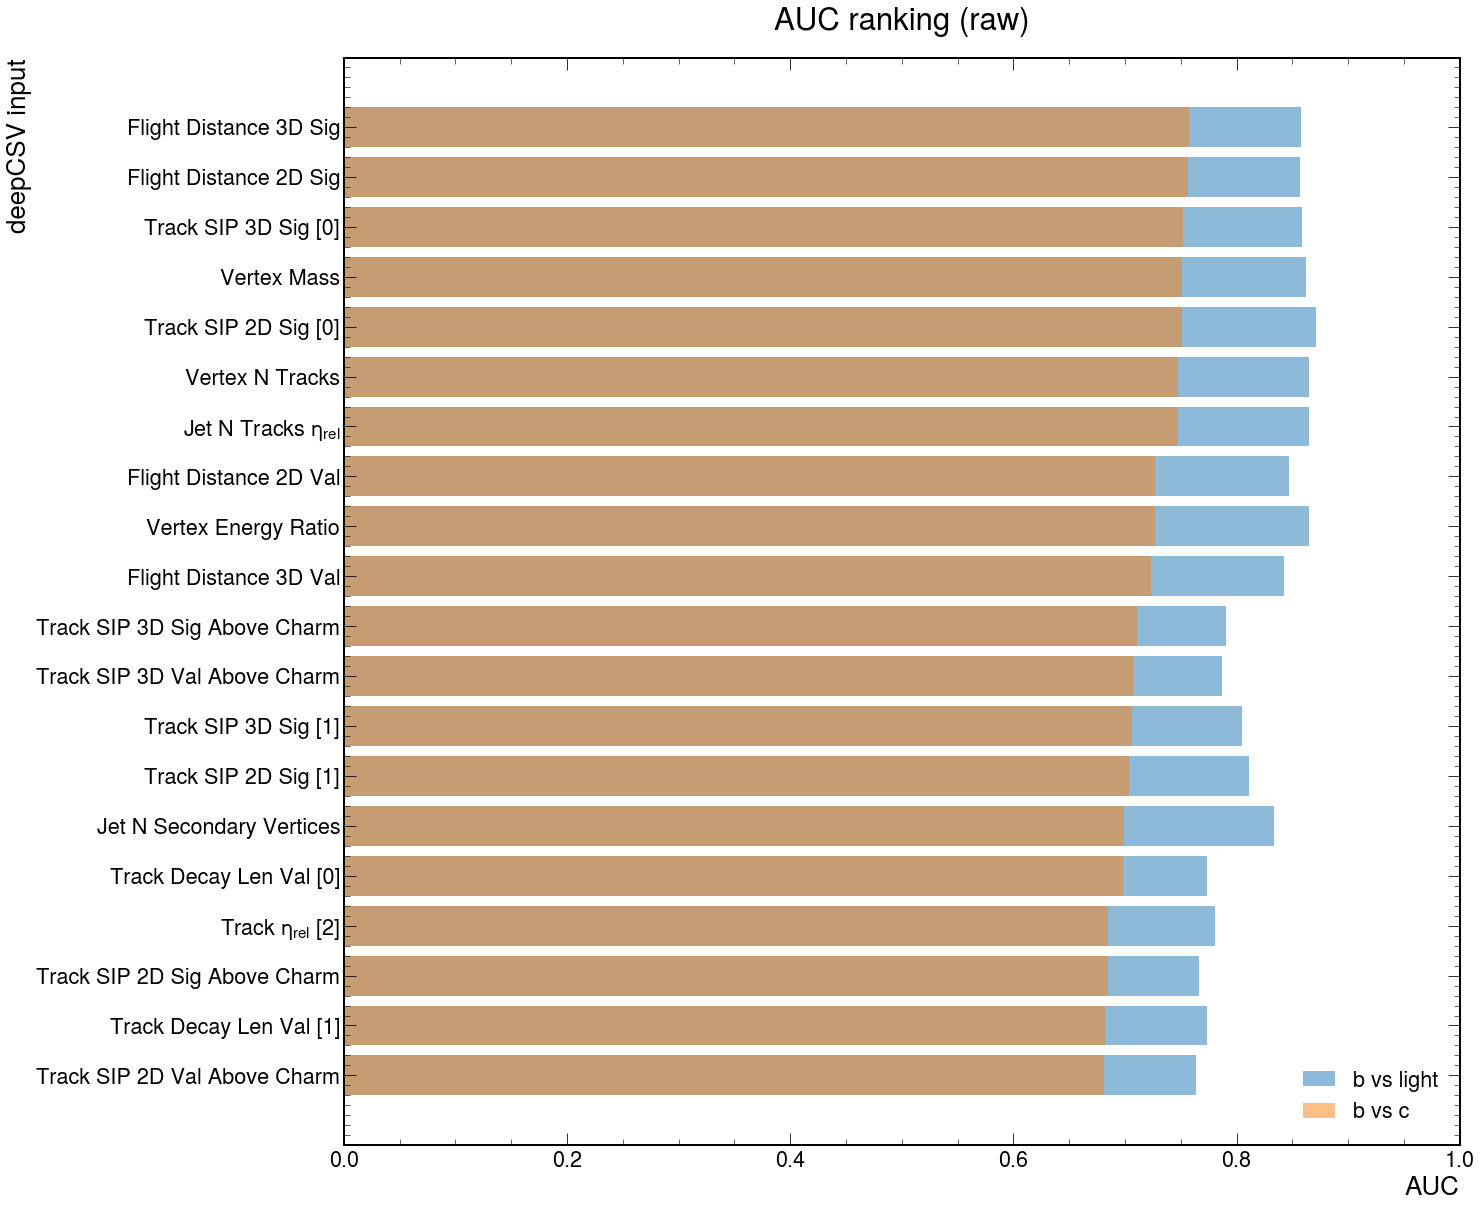

In [103]:
plot_ranking(df_parallel_raw_2,'raw')
plot_sorted(df_parallel_raw_2.sort_values('auc_bvl'),'raw','bvl')
plot_sorted(df_parallel_raw_2.sort_values('auc_bvc'),'raw','bvc')

In [105]:
df_parallel_noise_2 = pd.read_pickle(f'/home/um106329/aisafety/new_march_21/df_auc_ranking_NFiles_1_MODE_noise_PARAM_0.05_PARALLELTEST_v2.pkl')

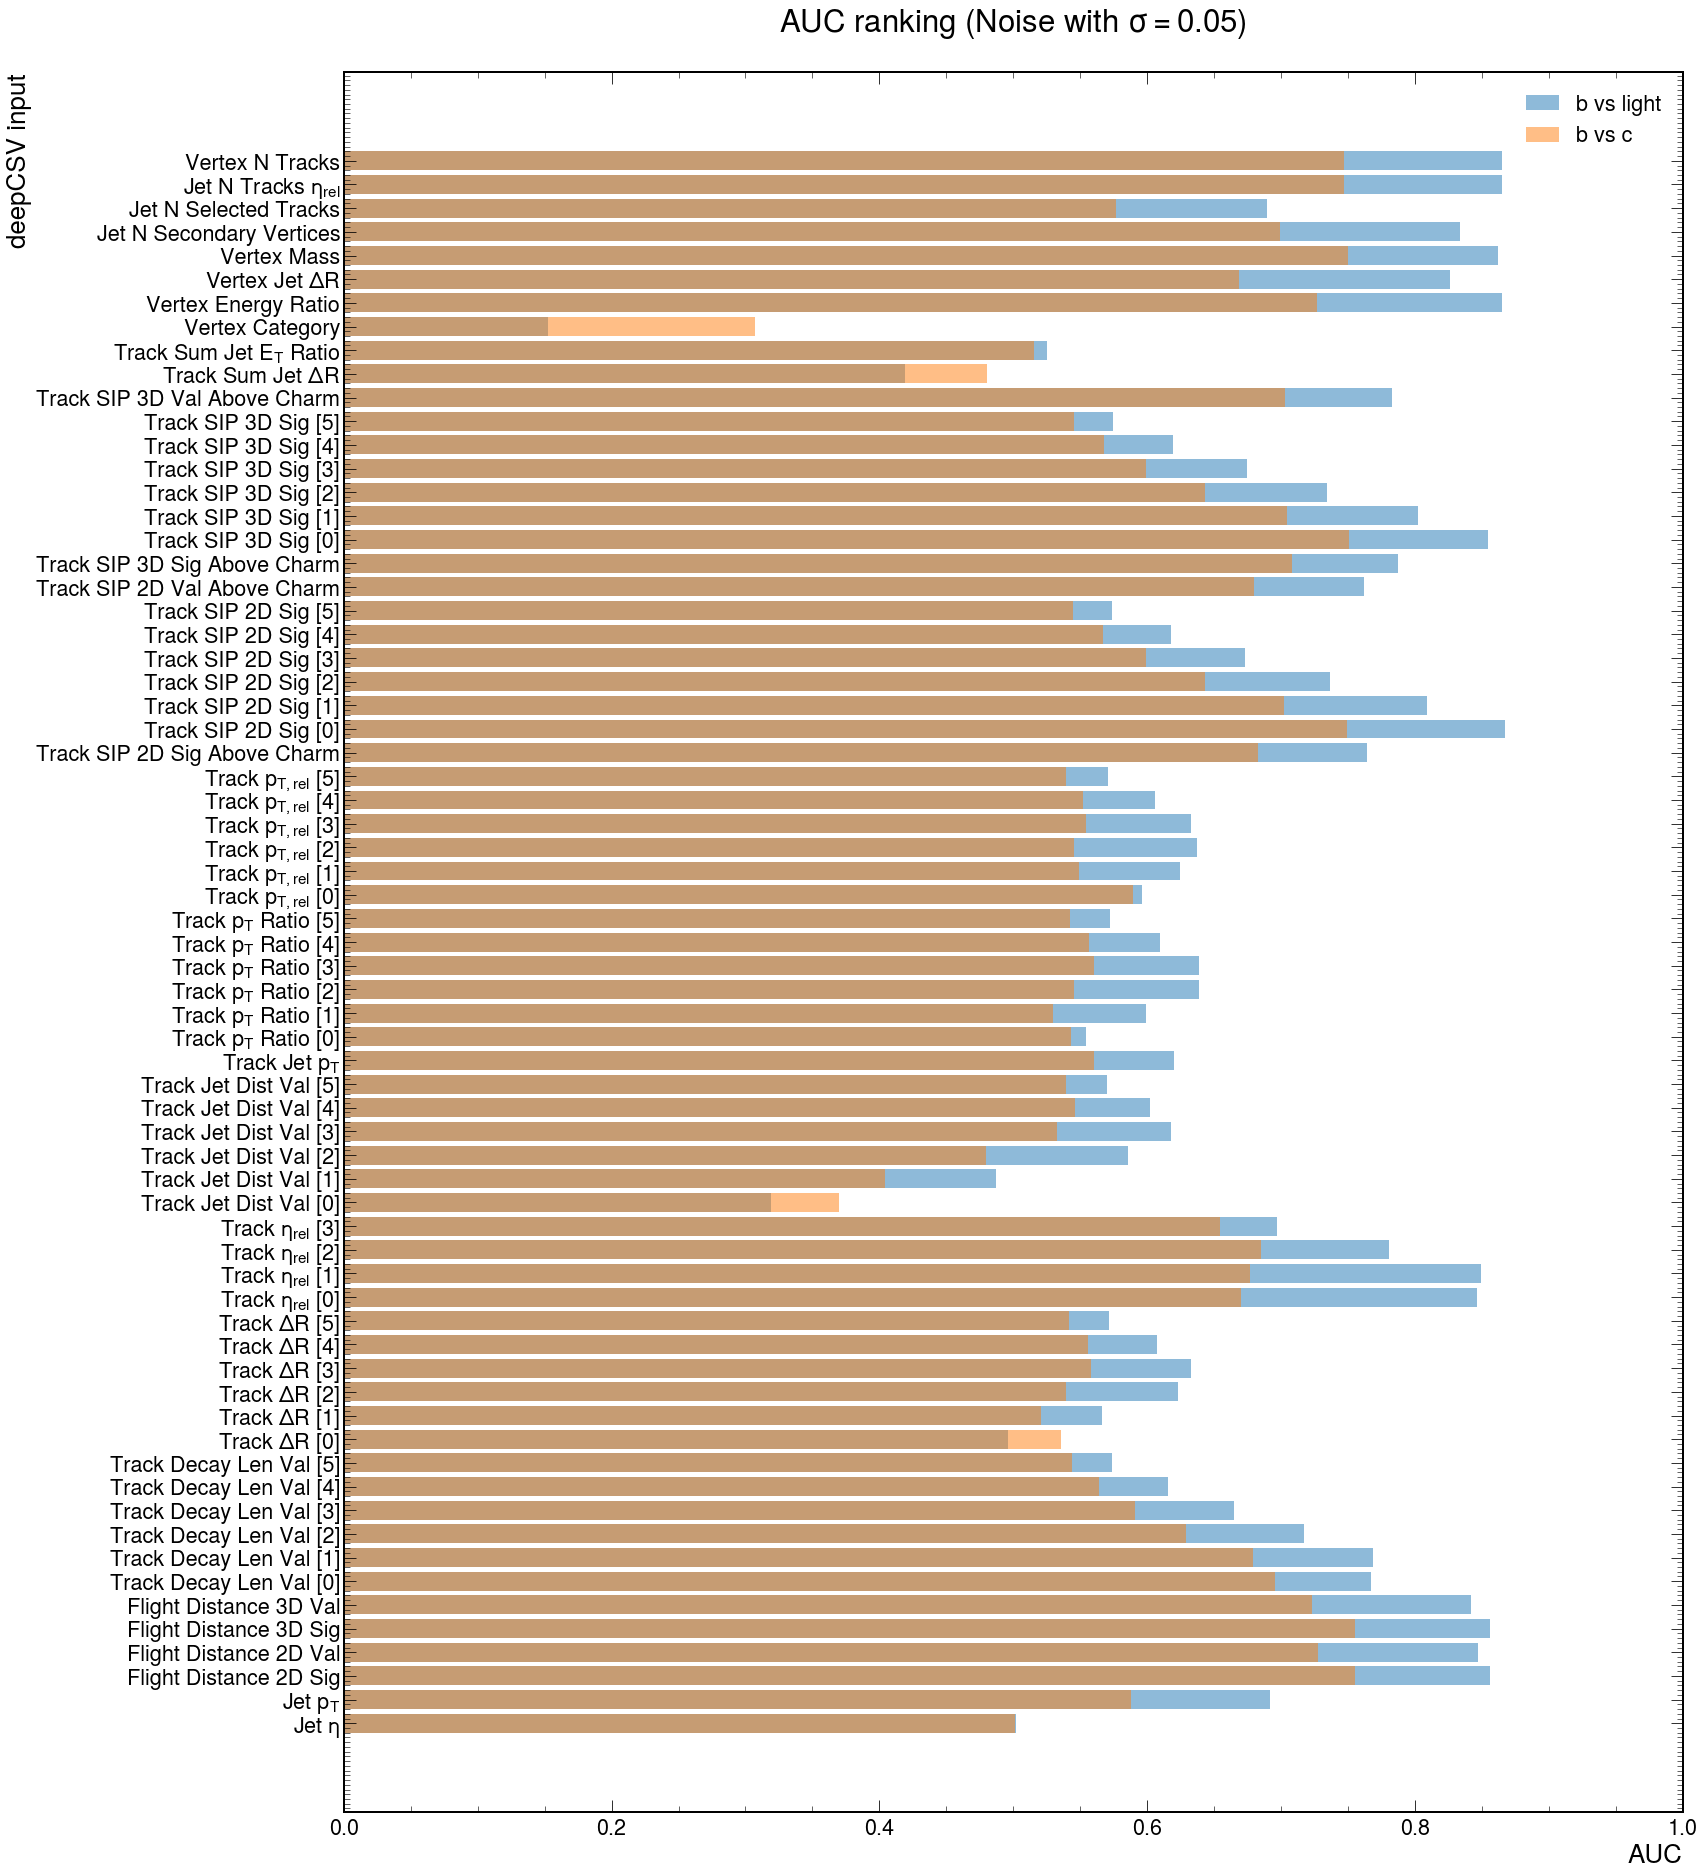

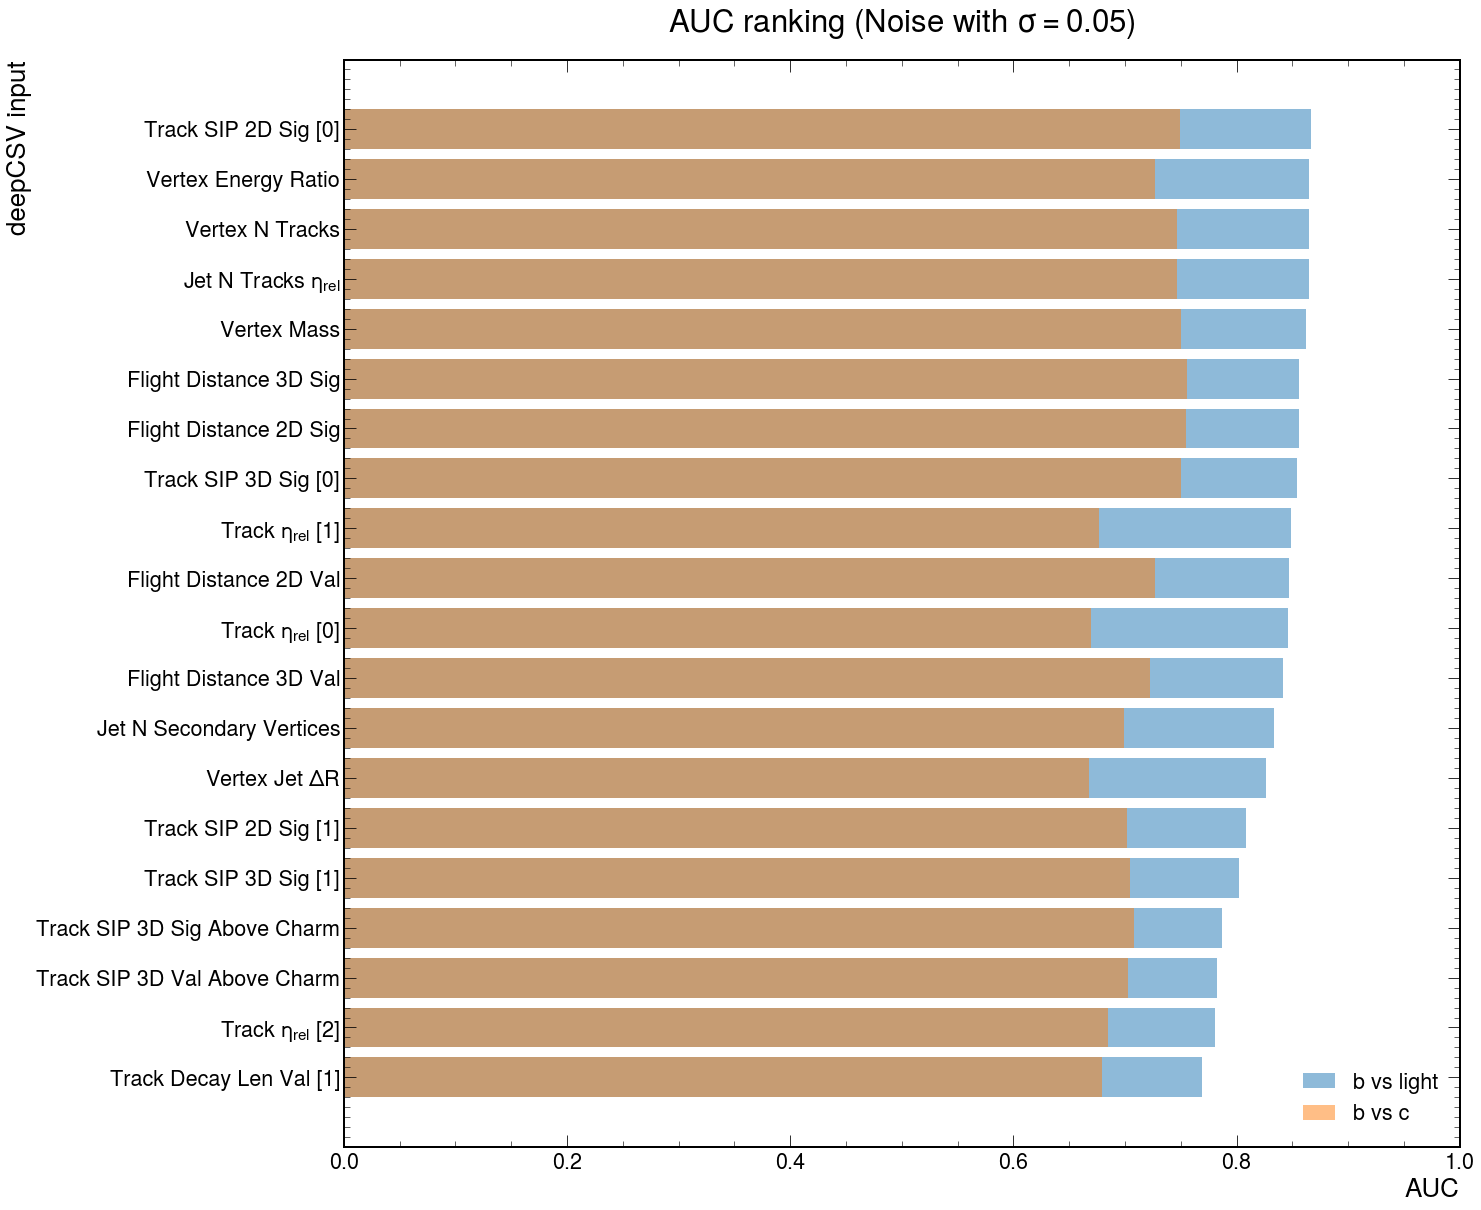

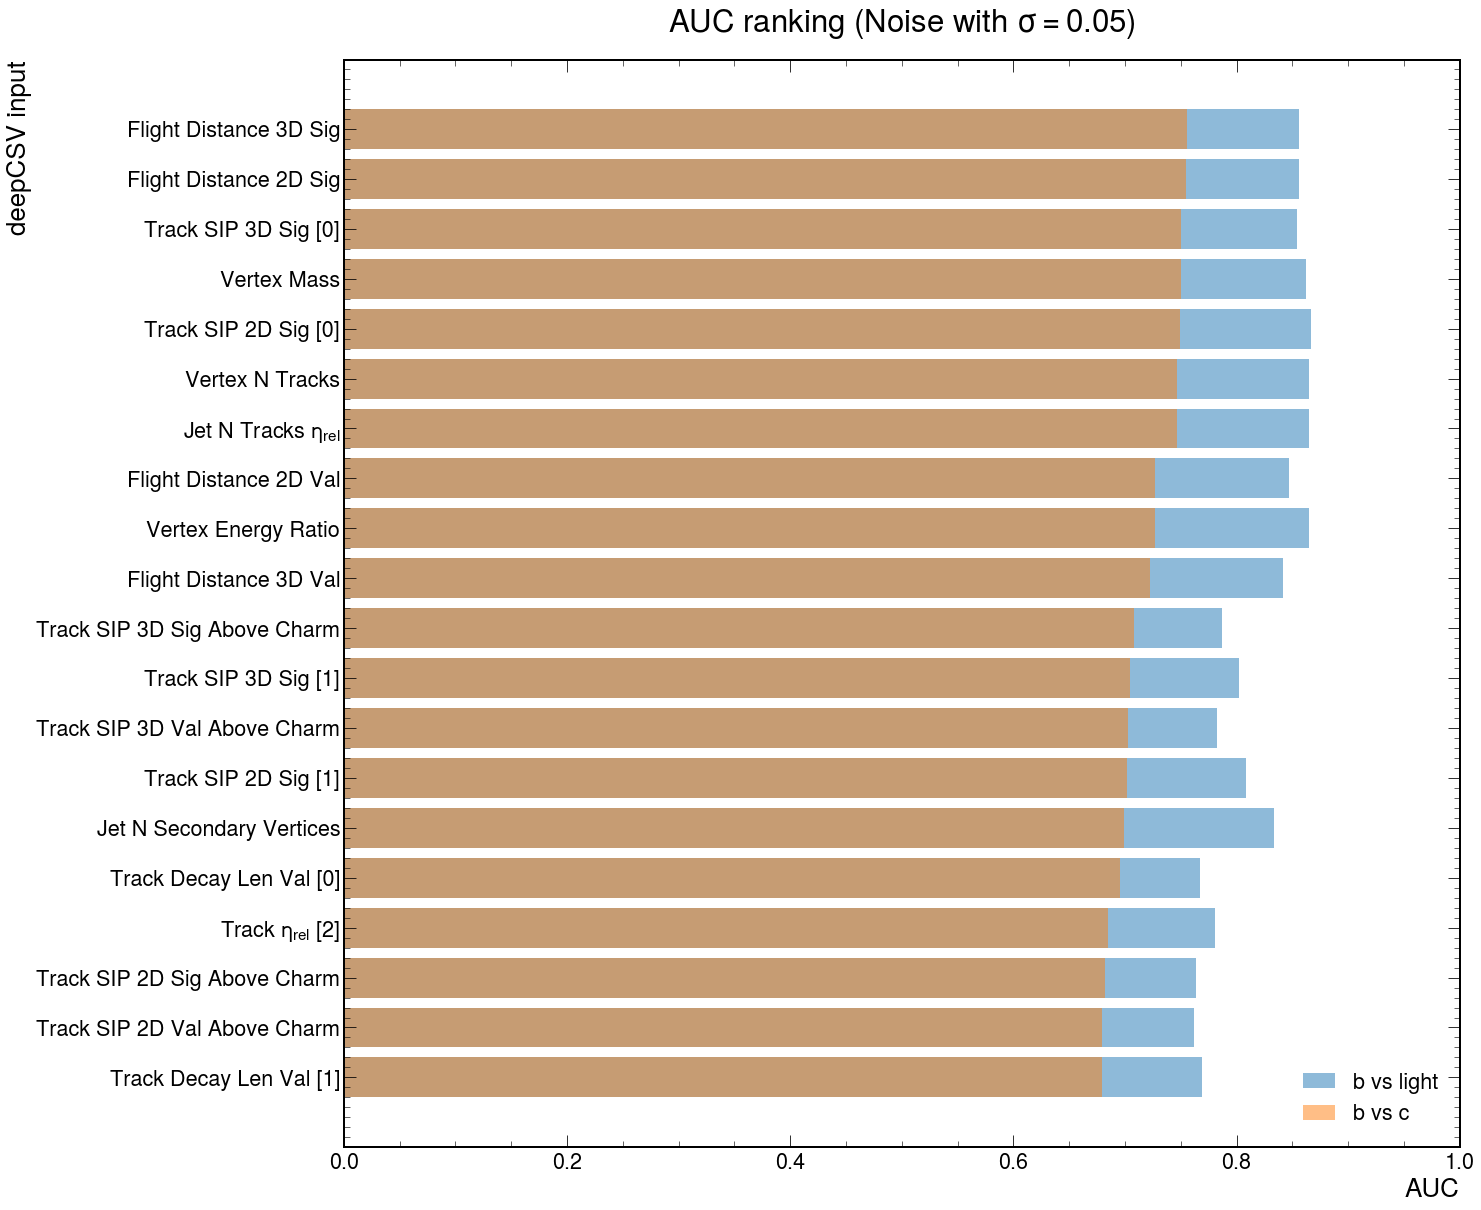

In [107]:
plot_ranking(df_parallel_noise_2,'noise',0.05)
plot_sorted(df_parallel_noise_2.sort_values('auc_bvl'),'noise','bvl',0.05)
plot_sorted(df_parallel_noise_2.sort_values('auc_bvc'),'noise','bvc',0.05)